In [1]:
import pandas as pd 
import yaml
import sys
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['figure.dpi']=130
pd.options.display.max_colwidth = 90 

#### Functions 

In [2]:
def read_query_results(filename):
    with open(filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results

In [3]:
def visualize_term(df, term):
    df_term=df.loc[df['search_term'] == term]
    term_list=df_term['sequence']
    date_list= df_term['date']
    window_left=[]
    window_right=[]
    term_l=[]
    for i in term_list:
        idx=i.index(term)
        term_size=len(term)+2
        window_left.append(i[2:idx-3])
        window_right.append(i[idx+term_size:])
        term_l.append(term)
    v_d = {'year':date_list, 'words_left':window_left, 'term':term_l, 'words_right': window_right}
    v_df = pd.DataFrame(v_d)
    f_vdf= v_df[['year','words_left', 'term', 'words_right']]
    return f_vdf

In [4]:
def freq_count(df):
    freq_count={}
    for i in df["year"]:
        if i not in freq_count:
            freq_count[i]={}
            freq_count[i]=1
                
        else:
            freq_count[i]+=1
    return freq_count

In [5]:
def plot_freq_count(freq_count, term):
    plt.plot(freq_count.keys(), freq_count.values(), 'x')
    plt.xlabel('Years')
    plt.ylabel('Frequency')
    plt.title('Frequency of ' + term + ' term')
    plt.show()

In [6]:
def plot_normalize_freq(publication, freq_results, term):
    normed_results = {}
    for year in freq_results:
        if year>0:
            normed_results[year] = freq_results[year]/float(publication[year][2])
    plt.plot(normed_results.keys(), normed_results.values(), 'x')
    plt.xlabel('Years')
    plt.ylabel('Normalized Frequency')
    plt.title('Normalized Frequency of ' + term + ' term')
    plt.show()

In [7]:
# Plot two lines with different scales on the same plot
def cumulative_plot(freq_term1, freq_term2, term1, term2):
    fig = plt.figure(figsize=(12, 6))
    years=set()
    line_weight = 3
    alpha = .5
    plt.plot(*zip(*sorted(freq_term1.items())), color='blue', lw=line_weight, alpha=alpha, label=term1, marker='d')
    plt.plot(*zip(*sorted(freq_term2.items())), color='orange', lw=line_weight, alpha=alpha, label=term2, marker='s')

    for y in freq_term1.keys(): 
        years.add(y)
    for y in freq_term2.keys(): 
        years.add(y)
        
    plt.xticks(sorted(list(years)), rotation=50)        
    plt.title('Cumulative yearly - Terms: '+ term1 +' & '+ term2)  
    plt.legend(loc='upper right')
    plt.ticklabel_format(style = 'plain')
    plt.ylabel('Raw Frequency')
    plt.xlabel("Years")
    plt.show()
    

In [8]:
# Plot 5 lines with different scales on the same plot
def total_cumulative_plot(freq_term1, freq_term2, freq_term3, freq_term4, freq_term5, term1, term2, term3, term4, term5):
    fig = plt.figure(figsize=(12, 6))
    years=set()
    line_weight = 3
    alpha = .5
    plt.plot(*zip(*sorted(freq_term1.items())), color='blue', lw=line_weight, alpha=alpha, label=term1, marker='d')
    plt.plot(*zip(*sorted(freq_term2.items())), color='orange', lw=line_weight, alpha=alpha, label=term2, marker='s')
    plt.plot(*zip(*sorted(freq_term3.items())), color='green', lw=line_weight, alpha=alpha, label=term3, marker='x')
    plt.plot(*zip(*sorted(freq_term4.items())), color='red', lw=line_weight, alpha=alpha, label=term4, marker='d')
    plt.plot(*zip(*sorted(freq_term5.items())), color='black', lw=line_weight, alpha=alpha, label=term5, marker='s')
    for y in freq_term1.keys(): 
        years.add(y)
    for y in freq_term2.keys(): 
        years.add(y)
    for y in freq_term3.keys(): 
        years.add(y)  
    for y in freq_term4.keys(): 
        years.add(y)  
    for y in freq_term5.keys(): 
        years.add(y)
        
    plt.xticks(sorted(list(years)), rotation=50) 
    
    plt.title('Cumulative yearly - Terms: '+ term1 +' & '+ term2 + ' & '+ term3 +' & '+ term4 + ' & ' + term5)
    plt.ticklabel_format(style = 'plain')
    plt.legend(loc='upper right')
    plt.ylabel('Raw Frequency')
    plt.xlabel("Years")
    plt.show()

#### Load the data into a Pandas dataframe

We are renaming the columns of the csv in order to avoi spaces in the column names

In [9]:
df = pd.read_csv("./results_NLS/results_window_concordance_total.csv") 
# Preview the first 5 lines of the loaded data 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
# Displaying the dataframe
df.head()

,date,title,edition,archive,filename,search_term,sequence
0,1797,Encyclopaedia Britannica,"Third edition, Volume 10, LES-MEC",/home/tdm/datasets/nls-data-encyclopaediaBritannica/149982692,alto/189154998.34.xml,man,"['french', 'and', 'italian', 'daffies', 'mr', 'maty', 'was', 'a', 'thinking', 'conscie..."
1,1797,Encyclopaedia Britannica,"Third edition, Volume 10, LES-MEC",/home/tdm/datasets/nls-data-encyclopaediaBritannica/149982692,alto/189155024.34.xml,man,"['do', 'any', 'thing', 'prejudicial', 'to', 'the', 'christian', 'faith', 'every', 'ten..."
2,1797,Encyclopaedia Britannica,"Third edition, Volume 10, LES-MEC",/home/tdm/datasets/nls-data-encyclopaediaBritannica/149982692,alto/189155869.34.xml,man,"['when', 'the', 'rope', 'h', 'ishooked', 'to', 'the', 'weight', 'k', 'a', 'man', 'turn..."
3,1797,Encyclopaedia Britannica,"Third edition, Volume 10, LES-MEC",/home/tdm/datasets/nls-data-encyclopaediaBritannica/149982692,alto/189155869.34.xml,man,"['the', 'axis', 'of', 'the', 'wheel', 'z', 'this', 'wheel', 'gives', 'the', 'man', 'th..."
4,1797,Encyclopaedia Britannica,"Third edition, Volume 10, LES-MEC",/home/tdm/datasets/nls-data-encyclopaediaBritannica/149982692,alto/189155882.34.xml,man,"['back', 'by', 'the', 'weight', 'of', 'the', 'burden', 'k', 'if', 'the', 'man', 'who',..."


###  Exploring "Scotland" Term

First we select the rows from the dataframe that has the **"scotland"** string in the "term" column, and count the number of elements. 

Later we visualize the left and right words for each **"scotland"** term found

And finally, we visualize the frequency of the **"scotland"** over the years.

In [10]:
scotland_vdf= visualize_term(df, "scotland")
print("The number of hits is: %s" %scotland_vdf['term'].value_counts())
#Just printing the first 10 hits, since we have 32131 rows for this term
scotland_vdf.head(10)

The number of hits is: scotland    27566
Name: term, dtype: int64


,year,words_left,term,words_right
20,1797,"at', 'the', 'hole', 'called', 'the', 'eye', 'as', 'already', 'mentioned', 'in'",scotland,"'it', 'is', 'frequent', 'to', 'have', 'the', 'stones', 'without', 'any', 'furrows']"
37,1797,"he', 'died', 'in', 'alloa', 'or', 'allowav', 'a', 'seaport', 'town', 'in'",scotland,"'seated', 'on', 'the', 'forth', 'about', 'miles', 'higher', 'up', 'the', 'river']"
38,1797,"first', 'that', 'were', 'laid', 'out', 'on', 'a', 'great', 'scale', 'in'",scotland,"'and', 'with', 'the', 'advice', 'of', 'le', 'nautre', 'were', 'indebted', 'to']"
40,1797,"a', 'thoroughfare', 'town', 'in', 'northumber', 'land', 'on', 'the', 'road', 'to'",scotland,"'here', 'malcolm', 'king', 'of', 'scotland', 'making', 'an', 'inroad', 'into', 'north..."
41,1797,"land', 'on', 'the', 'road', 'to'",scotland,"'here', 'malcolm', 'king', 'of', 'scotland', 'making', 'an', 'inroad', 'into', 'north..."
42,1797,"mowbray', 'earl', 'of', 'this', 'county', 'anno', 'likevvife', 'william', 'king', 'of'",scotland,"'in', 'invading', 'england', 'with', 'an', 'army', 'of', 'men', 'was', 'here']"
345,1797,"since', 'mr', 'boswell', 'also', 'informs', 'us', 'that', 'a', 'gentleman', 'in'",scotland,"'had', 'applied', 'to', 'him', 'for', 'directions', 'to', 'water', 'of', 'wa']"
346,1797,"distance', 'mean', 'proportion', 'c', 'mearns', 'or', 'kincardinshire', 'a', 'county',...",scotland,"'bounded', 'on', 'the', 'north', 'by', 'aberdeenfhire', 'on', 'the', 'cast', 'by']"
347,1797,"dunotter', 'castle', 'the', 'ancient', 'seat', 'of', 'the', 'earls', 'mariflial', 'of'",scotland,"'situated', 'on', 'a', 'high', 'perpendicular', 'rock', 'almost', 'surrounded', 'by',..."
348,1797,"of', 'as', 'a', 'check', 'to', 'agriculture', 'in', 'many', 'parts', 'of'",scotland,"'the', 'northwest', 'part', 'of', 'the', 'hire', 'being', 'mountainous', 'is', 'more']"


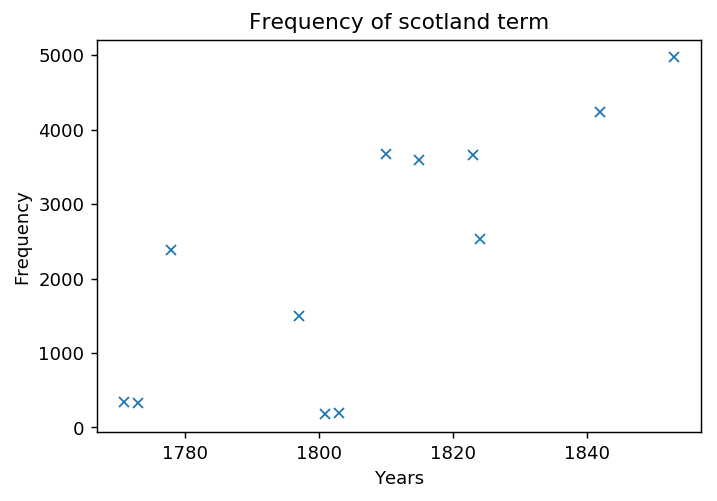

In [11]:
scotland_f_count=freq_count(scotland_vdf)
mpl.rcParams['figure.dpi']=130
plot_freq_count(scotland_f_count, "scotland")

In [12]:
#displaying the same information as a dictionary - keys are the years, and values are frequencies
scotland_f_count

{1771: 342,
 1773: 335,
 1778: 2379,
 1797: 1493,
 1801: 177,
 1803: 193,
 1810: 3671,
 1815: 3595,
 1823: 3654,
 1824: 2525,
 1842: 4233,
 1853: 4969}

##### Normalizing Frequencies of Scotland

In [13]:
# This cell I just need to run it once - to calculate the normalized SET of publications:
#YEAR, [VOLUMES, PAGES, WORDS]

norm_publication=read_query_results('./results_NLS/results_nls_normalized')
#for printing the values, we are going to sort the values by the years. 
#e.g --> First: 1771 year, with 3 volumes, 2722 pages, and 2587557 words. 
#e.g --> Last: 1853 year, with 22 volumes , 19628 pages and 23475295 words.

sorted(norm_publication.items())

[(1771, [3, 2722, 2587557]),
 (1773, [3, 2740, 2581066]),
 (1778, [10, 9448, 10218591]),
 (1797, [11, 9512, 10495573]),
 (1801, [2, 1740, 1943036]),
 (1803, [2, 1760, 1956641]),
 (1810, [40, 17662, 18876327]),
 (1815, [20, 17470, 18764604]),
 (1823, [20, 17546, 18742386]),
 (1824, [15, 13436, 12258062]),
 (1842, [22, 19532, 22407301]),
 (1853, [22, 19628, 23475295])]

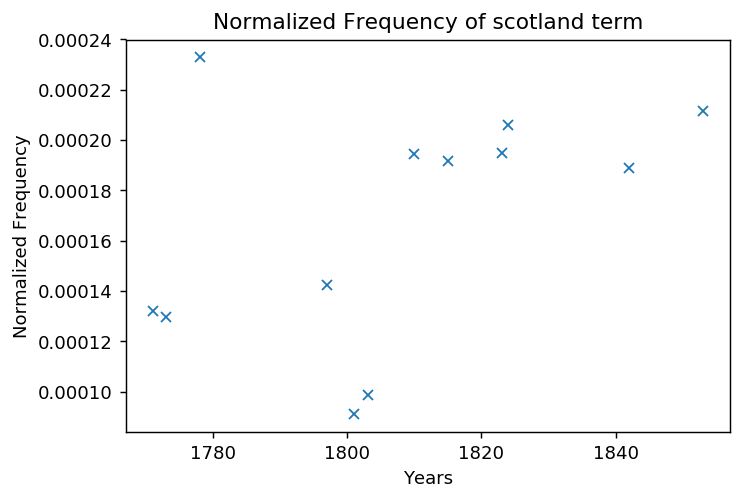

In [14]:
plot_normalize_freq(norm_publication, scotland_f_count, "scotland")

###  Exploring "Edinburgh" Term

First we select the rows from the dataframe that has the **"edinburgh"** string in the "term" column, and count the number of elements. 

Later we visualize the left and right words for each **"edinburgh"** term found

And finally, we visualize the frequency of the **"edinburgh"** over the years.

In [15]:
edinburgh_vdf= visualize_term(df, "edinburgh")
print("The number of hits is: %s" %edinburgh_vdf['term'].value_counts())
#Just printing the first 10 hits, since we have 14265 rows for this term
edinburgh_vdf.head(10)

The number of hits is: edinburgh    12479
Name: term, dtype: int64


,year,words_left,term,words_right
25,1797,"from', 'the', 'accounts', 'given', 'by', 'the', 'late', 'dr', 'whytt', 'of'",edinburgh,"'and', 'others', 'it', 'should', 'appear', 'that', 'this', 'had', 'sometimes', 'happe..."
34,1797,"stirling', 'and', 'frequently', 'the', 'three', 'principal', 'fortrefles', 'of', 'the'...",edinburgh,"'stirling', 'and', 'dunbarton', 'the', 'last', 'heir', 'of', 'the', 'scottish', 'mona..."
35,1797,"regent', 'mar', 'after', 'ihe', 'was', 'obliged', 'by', 'the', 'treaty', 'of'",edinburgh,"'to', 'desist', 'from', 'wearing', 'the', 'arms', 'of', 'england', 'in', 'the']"
94,1797,"considered', 'as', 'presages', 'of', 'a', 'pestilence', 'they', 'appear', 'annually', ...",edinburgh,"'in', 'february', 'and', 'feedon', 'the', 'berries', 'of', 'the', 'mountainalh', 'they']"
350,1797,"into', 'inches', 'the', 'flandard', 'is', 'kept', 'in', 'the', 'couneilehamber', 'of'",edinburgh,"'and', 'being', 'compared', 'with', 'the', 'englilh', 'yard', 'is', 'found', 'to']"
437,1797,"with', 'in', 'duddingilonloch', 'a', 'freshwater', 'lake', 'within', 'a', 'mile', 'of'",edinburgh,"'in', 'france', 'it', 'stays', 'throughout', 'the', 'year', 'and', 'makes', 'a']"
448,1797,"comprehensive', 'system', 'in', 'three', 'volumes', 'publiffied', 'by', 'mr', 'elliot'...",edinburgh,"'upon', 'a', 'plan', 'approved', 'of', 'by', 'dr', 'monro', 'and', 'executed']"
487,1797,"and', 'on', 'the', 'th', 'of', 'june', 'held', 'a', 'parliament', 'at'",edinburgh,"'at', 'that', 'time', 'the', 'clergy', 'met', 'in', 'one', 'of', 'the']"
488,1797,"mention', 'is', 'made', 'of', 'his', 'being', 'minister', 'of', 'pencaitland', 'near'",edinburgh,"'in', 'but', 'we', 'find', 'nothing', 'said', 'there', 'or', 'any', 'where']"
525,1797,"mild', 'difpolitions', 'and', 'peaceable', 'deportment', 'a', 'parliament', 'was', 'su...",edinburgh,"'in', 'summer', 'and', 'the', 'duke', 'was', 'appointed', 'commiffioner', 'besides', ..."


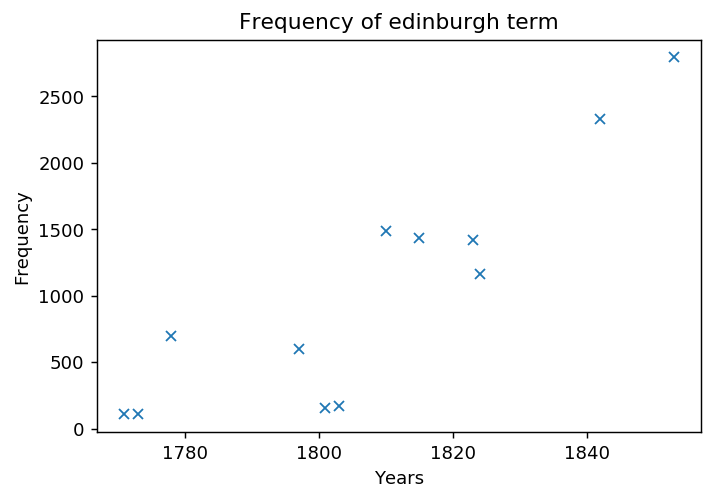

In [16]:
edinburgh_f_count=freq_count(edinburgh_vdf)
plot_freq_count(edinburgh_f_count, "edinburgh")

In [17]:
#displaying the same information as a dictionary - keys are the years, and values are frequencies
edinburgh_f_count

{1771: 110,
 1773: 108,
 1778: 698,
 1797: 602,
 1801: 156,
 1803: 172,
 1810: 1487,
 1815: 1438,
 1823: 1422,
 1824: 1162,
 1842: 2330,
 1853: 2794}

##### Normalizing Frequencies of Edinburgh

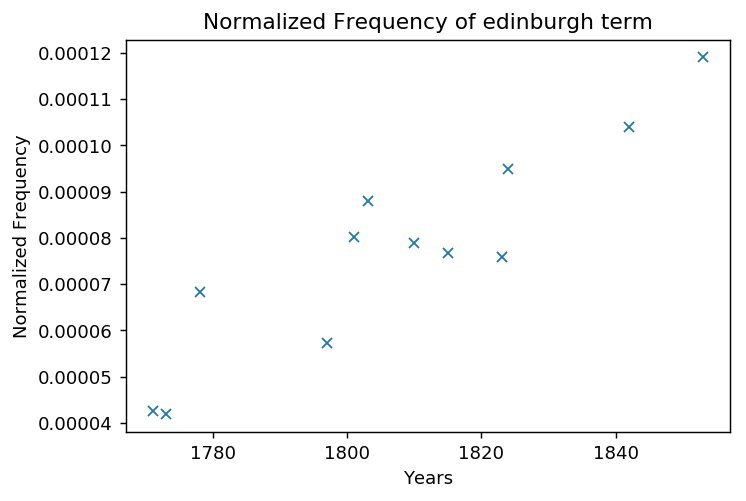

In [18]:
plot_normalize_freq(norm_publication, edinburgh_f_count, "edinburgh")

###  Exploring "Woman" Term

First we select the rows from the dataframe that has the **"woman"** string in the "term" column, and count the number of elements. 

Later we visualize the left and right words for each **"woman"** term found

And finally, we visualize the frequency of the **"woman"** over the years.

In [19]:
woman_vdf= visualize_term(df, "woman")
print("The number of hits is: %s" %woman_vdf['term'].value_counts())
#Just printing the first 10 hits, since we have 9172 rows for this term
woman_vdf.head(10)

The number of hits is: woman    7402
Name: term, dtype: int64


,year,words_left,term,words_right
30,1797,"the', 'pajlori', 'who', 'crowd', 'round', 'the', 'child', 'and', 'particularly', 'one'",woman,"'who', 'holds', 'her', 'hand', 'before', 'her', 'face', 'left', 'her', 'eyes']"
51,1797,"by', 'the', 'queens', 'conferring', 'could', 'a', 'stroke', 'from', 'an', 'angry'",woman,"'tinge', 'the', 'honour', 'on', 'him', 'the', 'honour', 'of', 'the', 'garter']"
53,1797,"her', 'car', 'case', 'if', 'this', 'be', 'true', 'where', 'is', 'the'",woman,"'that', 'would', 'not', 'sacrifice', 'such', 'a', 'lover', 'to', 'her', 'resentment']"
55,1797,"st', 'luke', 'chap', 'xxii', 'and', 'the', 'history', 'of', 'the', 'adulterous'",woman,"'in', 'st', 'john', 'chap', 'viii', 'deuteronomy', 'one', 'of', 'the', 'sacred']"
58,1797,"slave', 'they', 'lost', 'in', 'battle', 'and', 'a', 'man', 'for', 'every'",woman,"'that', 'was', 'killed', 'but', 'mahomet', 'regulated', 'the', 'laws', 'of', 'reprisal']"
70,1797,"described', 'and', 'accounted', 'for', 'the', 'following', 'anecdote', 'of', 'an', 'al...",woman,"'yve', 'find', 'adduced', 'as', 'a', 'remarkable', 'proof', 'of', 'their', 'innate']"
71,1797,"creeks', 'and', 'chadtaws', 'the', 'two', 'latter', 'punish', 'adultery', 'in', 'a'",woman,"'by', 'cutting', 'off', 'her', 'hair', 'which', 'they', 'will', 'not', 'suffer']"
72,1797,"most', 'diligent', 'search', 'were', 'forced', 'to', 'return', 'for', 'days', 'this'",woman,"'held', 'on', 'her', 'course', 'through', 'woods', 'and', 'defarts', 'without', 'any']"
73,1797,"again', 'repulsed', 'wondering', 'that', 'they', 'could', 'difeover', 'none', 'but', 'a'",woman,"'who', 'was', 'seen', 'evriy', 'where', 'this', 'was', 'madame', 'de', 'vercheres']"
74,1797,"had', 'but', 'time', 'to', 'hut', 'the', 'gate', 'with', 'the', 'young'",woman,"'there', 'was', 'not', 'a', 'soul', 'but', 'one', 'raw', 'soldier', 'she']"


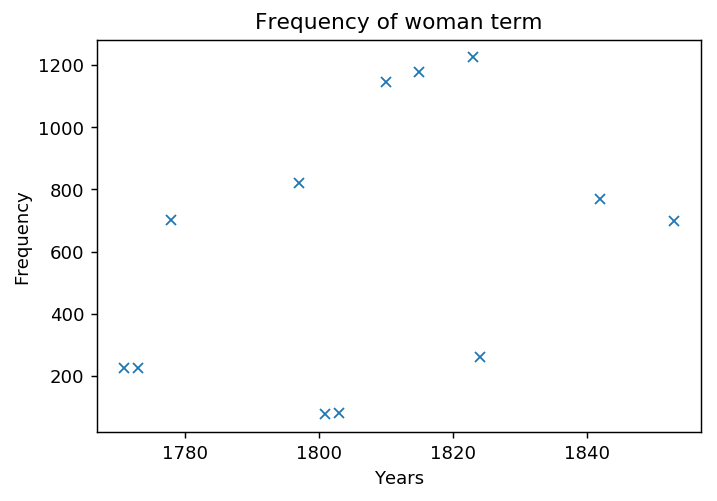

In [20]:
woman_f_count=freq_count(woman_vdf)
plot_freq_count(woman_f_count, "woman")

In [21]:
#displaying the same information as a dictionary - keys are the years, and values are frequencies
woman_f_count

{1771: 225,
 1773: 226,
 1778: 702,
 1797: 820,
 1801: 76,
 1803: 79,
 1810: 1146,
 1815: 1178,
 1823: 1225,
 1824: 260,
 1842: 768,
 1853: 697}

##### Normalizing Frequencies of Woman

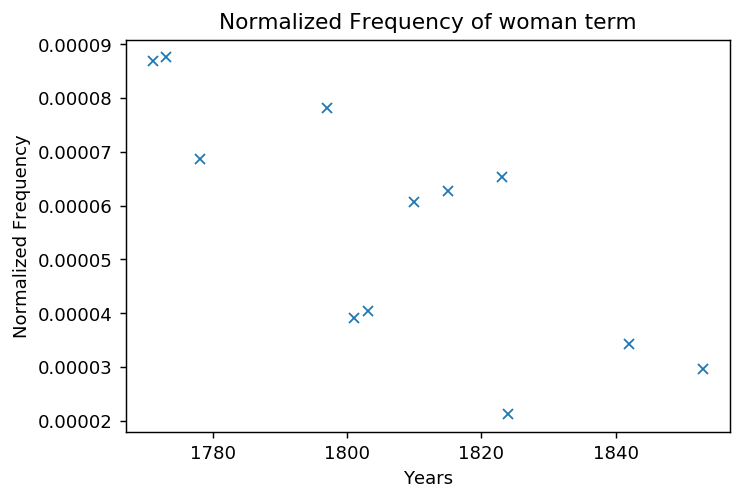

In [22]:
plot_normalize_freq(norm_publication, woman_f_count, "woman")

###  Exploring "Maid" Term

First we select the rows from the dataframe that has the **"maid"** string in the "term" column, and count the number of elements. 

Later we visualize the left and right words for each **"maid"** term found

And finally, we visualize the frequency of the **"maid"** over the years.

In [23]:
maid_vdf= visualize_term(df, "maid")
print("The number of hits is: %s" %maid_vdf['term'].value_counts())
#Just printing the first 10 hits, since we have 714 rows for this term
maid_vdf.head(10)

The number of hits is: maid    582
Name: term, dtype: int64


,year,words_left,term,words_right
385,1797,"a', 'sum', 'of', 'money', 'paid', 'to', 'the', 'lord', 'when', 'a'",maid,"'was', 'manned', 'within', 'hislordship', 'the', 'word', 'isoldbritilh', 'and', 'sign..."
387,1797,"of', 'leucate', 'with', 'the', 'reversion', 'for', 'her', 'son', 'the', 'famous'",maid,"'of', 'orleans', 'also', 'is', 'an', 'example', 'known', 'to', 'every', 'reader']"
468,1797,"and', 'golfe', 'be', 'utterly', 'cryed', 'doivn', 'and', 'that', 'bonumarkes', 'be'",maid,"'at', 'ilk', 'parijh', 'kirk', 'a', 'pair', 'of', 'butts', 'and', 'fchutting']"
949,1797,"lewis', 'had', 'turned', 'catholic', 'through', 'the', 'persuasions', 'of', 'a', 'cath...",maid,"'who', 'had', 'lived', 'years', 'in', 'the', 'family', 'in', 'o', 'ctober']"
950,1797,"mark', 'anthony', 'their', 'son', 'peter', 'their', 'second', 'son', 'and', 'this'",maid,"'anthony', 'was', 'educated', 'for', 'the', 'bar', 'but', 'being', 'of', 'a']"
1297,1797,"as', 'to', 'a', 'particular', 'hone', 'which', 'he', 'pointed', 'out', 'the'",maid,"'while', 'her', 'mailer', 'was', 'out', 'innocentlylooking', 'on', 'the', 'paviers', ..."
1388,1797,"and', 'arteries', 'with', 'which', 'it', 'is', 'filled', 'hence', 'a', 'healthy'",maid,"'being', 'arrived', 'at', 'her', 'growth', 'begins', 'to', 'prepare', 'more', 'nutrim..."
1499,1797,"in', 'the', 'affair', 'of', 'jl', 'elizabeth', 'barton', 'called', 'the', 'holy'",maid,"'of', 'kent', 'this', 'le', 'j', 'was', 'an', 'infamous', 'impostor', 'suborned']"
1503,1797,"wife', 'who', 'inlifled', 'that', 'he', 'fliould', 'make', 'use', 'of', 'their'",maid,"'hagar', 'in', 'order', 'to', 'raise', 'up', 'children', 'the', 'covenant', 'god']"
1585,1797,"in', 'this', 'the', 'dignified', 'princess', 'is', 'totally', 'lost', 'in', 'the'",maid,"'marien', 'of', 'her', 'pretended', 'imitators', 'and', 'buchanan', 'who', 'in', 'his']"


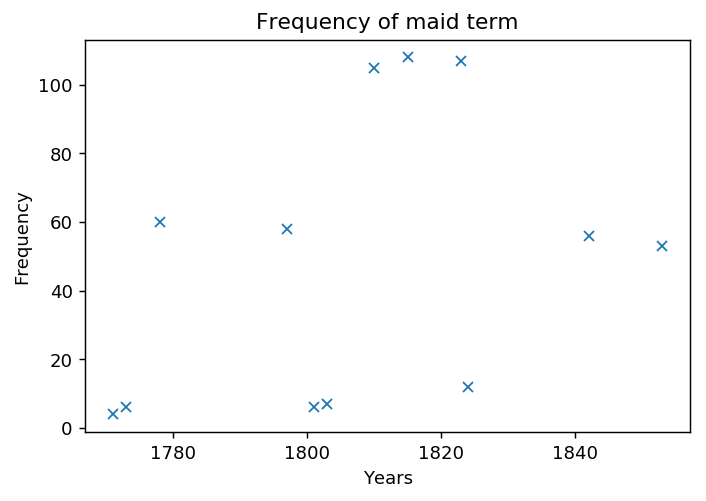

In [24]:
maid_f_count=freq_count(maid_vdf)
plot_freq_count(maid_f_count, "maid")

In [25]:
#displaying the same information as a dictionary - keys are the years, and values are frequencies
maid_f_count

{1771: 4,
 1773: 6,
 1778: 60,
 1797: 58,
 1801: 6,
 1803: 7,
 1810: 105,
 1815: 108,
 1823: 107,
 1824: 12,
 1842: 56,
 1853: 53}

##### Normalizing Frequencies of Maid

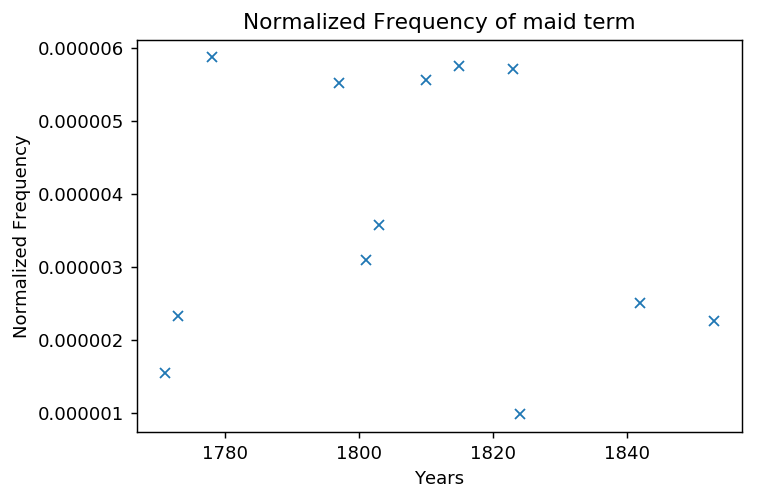

In [26]:
plot_normalize_freq(norm_publication, maid_f_count, "maid")

###  Exploring "Man" Term
First we select the rows from the dataframe that has the **"man"** string in the "term" column, and count the number of elements. 

Later we visualize the left and right words for each **"man"** term found

And finally, we visualize the frequency of the **"man"** over the years.

In [27]:
man_vdf= visualize_term(df, "man")
print("The number of hits is: %s" %man_vdf['term'].value_counts())
#Just printing the first 10 hits, since we have 80062 rows for this term
man_vdf.head(10)

The number of hits is: man    66876
Name: term, dtype: int64


,year,words_left,term,words_right
0,1797,"french', 'and', 'italian', 'daffies', 'mr', 'maty', 'was', 'a', 'thinking', 'conscient...",man,"'and', 'having', 'conceived', 'some', 'doubts', 'about', 'the', 'articles', 'he', 'had']"
1,1797,"do', 'any', 'thing', 'prejudicial', 'to', 'the', 'christian', 'faith', 'every', 'tenth'",man,"'of', 'those', 'who', 'remained', 'was', 'put', 'to', 'death', 'their', 'perseverance']"
2,1797,"when', 'the', 'rope', 'h', 'ishooked', 'to', 'the', 'weight', 'k', 'a'",man,"'turns', 'the', 'winch', 'a', 'on', 'the', 'axis', 'whereof', 'is', 'the']"
3,1797,"the', 'axis', 'of', 'the', 'wheel', 'z', 'this', 'wheel', 'gives', 'the'",man,"'that', 'turns', 'it', 'an', 'absolute', 'command', 'over', 'the', 'gib', 'so']"
4,1797,"back', 'by', 'the', 'weight', 'of', 'the', 'burden', 'k', 'if', 'the'",man,"'who', 'raises', 'it', 'ihould', 'happen', 'to', 'be', 'careless', 'and', 'to']"
5,1797,"into', 'a', 'cart', 'standing', 'thereon', 'in', 'the', 'following'",man,"r', 'a', 'man', 'takes', 'hold', 'of', 'the', 'rope', 'tt', 'which', 'goes', 'over', '..."
6,1797,"difengages', 'the', 'catch', 'from', 'the', 'ratchetwheel', 'qj', 'and', 'then', 'the'",man,"'at', 'the', 'winch', 'a', 'turns', 'it', 'backward', 'and', 'lets', 'down']"
7,1797,"k', 'but', 'if', 'the', 'weight', 'pulls', 'too', 'hard', 'againll', 'this'",man,"'another', 'lays', 'hold', 'of', 'the', 'handle', 'v', 'and', 'by', 'pulling']"
8,1797,"and', 'so', 'makes', 'it', 'as', 'to', 'in', 'which', 'case', 'a'",man,"'may', 'aife', 'times', 'as', 'much', 'weight', 'by', 'this', 'engine', 'as']"
9,1797,"abated', 'by', 'men', 'pulhing', 'round', 'the', 'handfpokes', 'y', 'whilst', 'the'",man,"'at', 'a', 'turns', 'the', 'winch', 'we', 'have', 'only', 'ihown', 'the']"


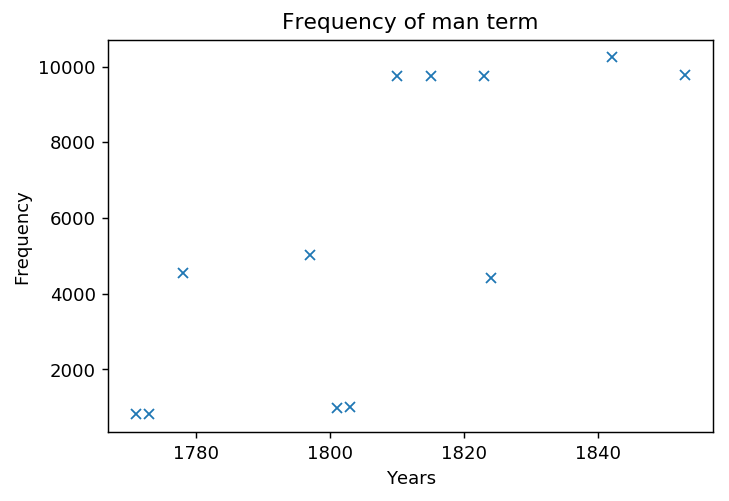

In [28]:
man_f_count=freq_count(man_vdf)
plot_freq_count(man_f_count, "man")

In [29]:
#displaying the same information as a dictionary - keys are the years, and values are frequencies
man_f_count

{1771: 810,
 1773: 826,
 1778: 4548,
 1797: 5014,
 1801: 989,
 1803: 999,
 1810: 9759,
 1815: 9756,
 1823: 9755,
 1824: 4404,
 1842: 10241,
 1853: 9775}

##### Normalizing Frequencies of man

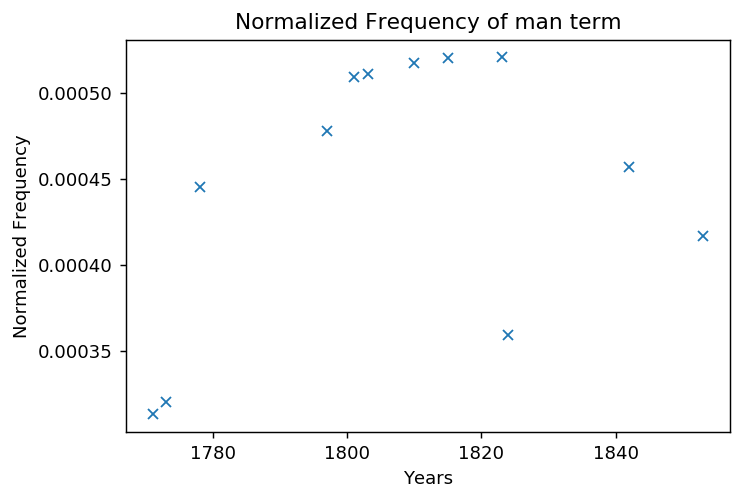

In [30]:
plot_normalize_freq(norm_publication, man_f_count, "man")

## Cumulative Plots

A serie of cumalive plots showing the frequencies of two terms over the years. 

And a final one, showing the frequencies of all of them over the years 

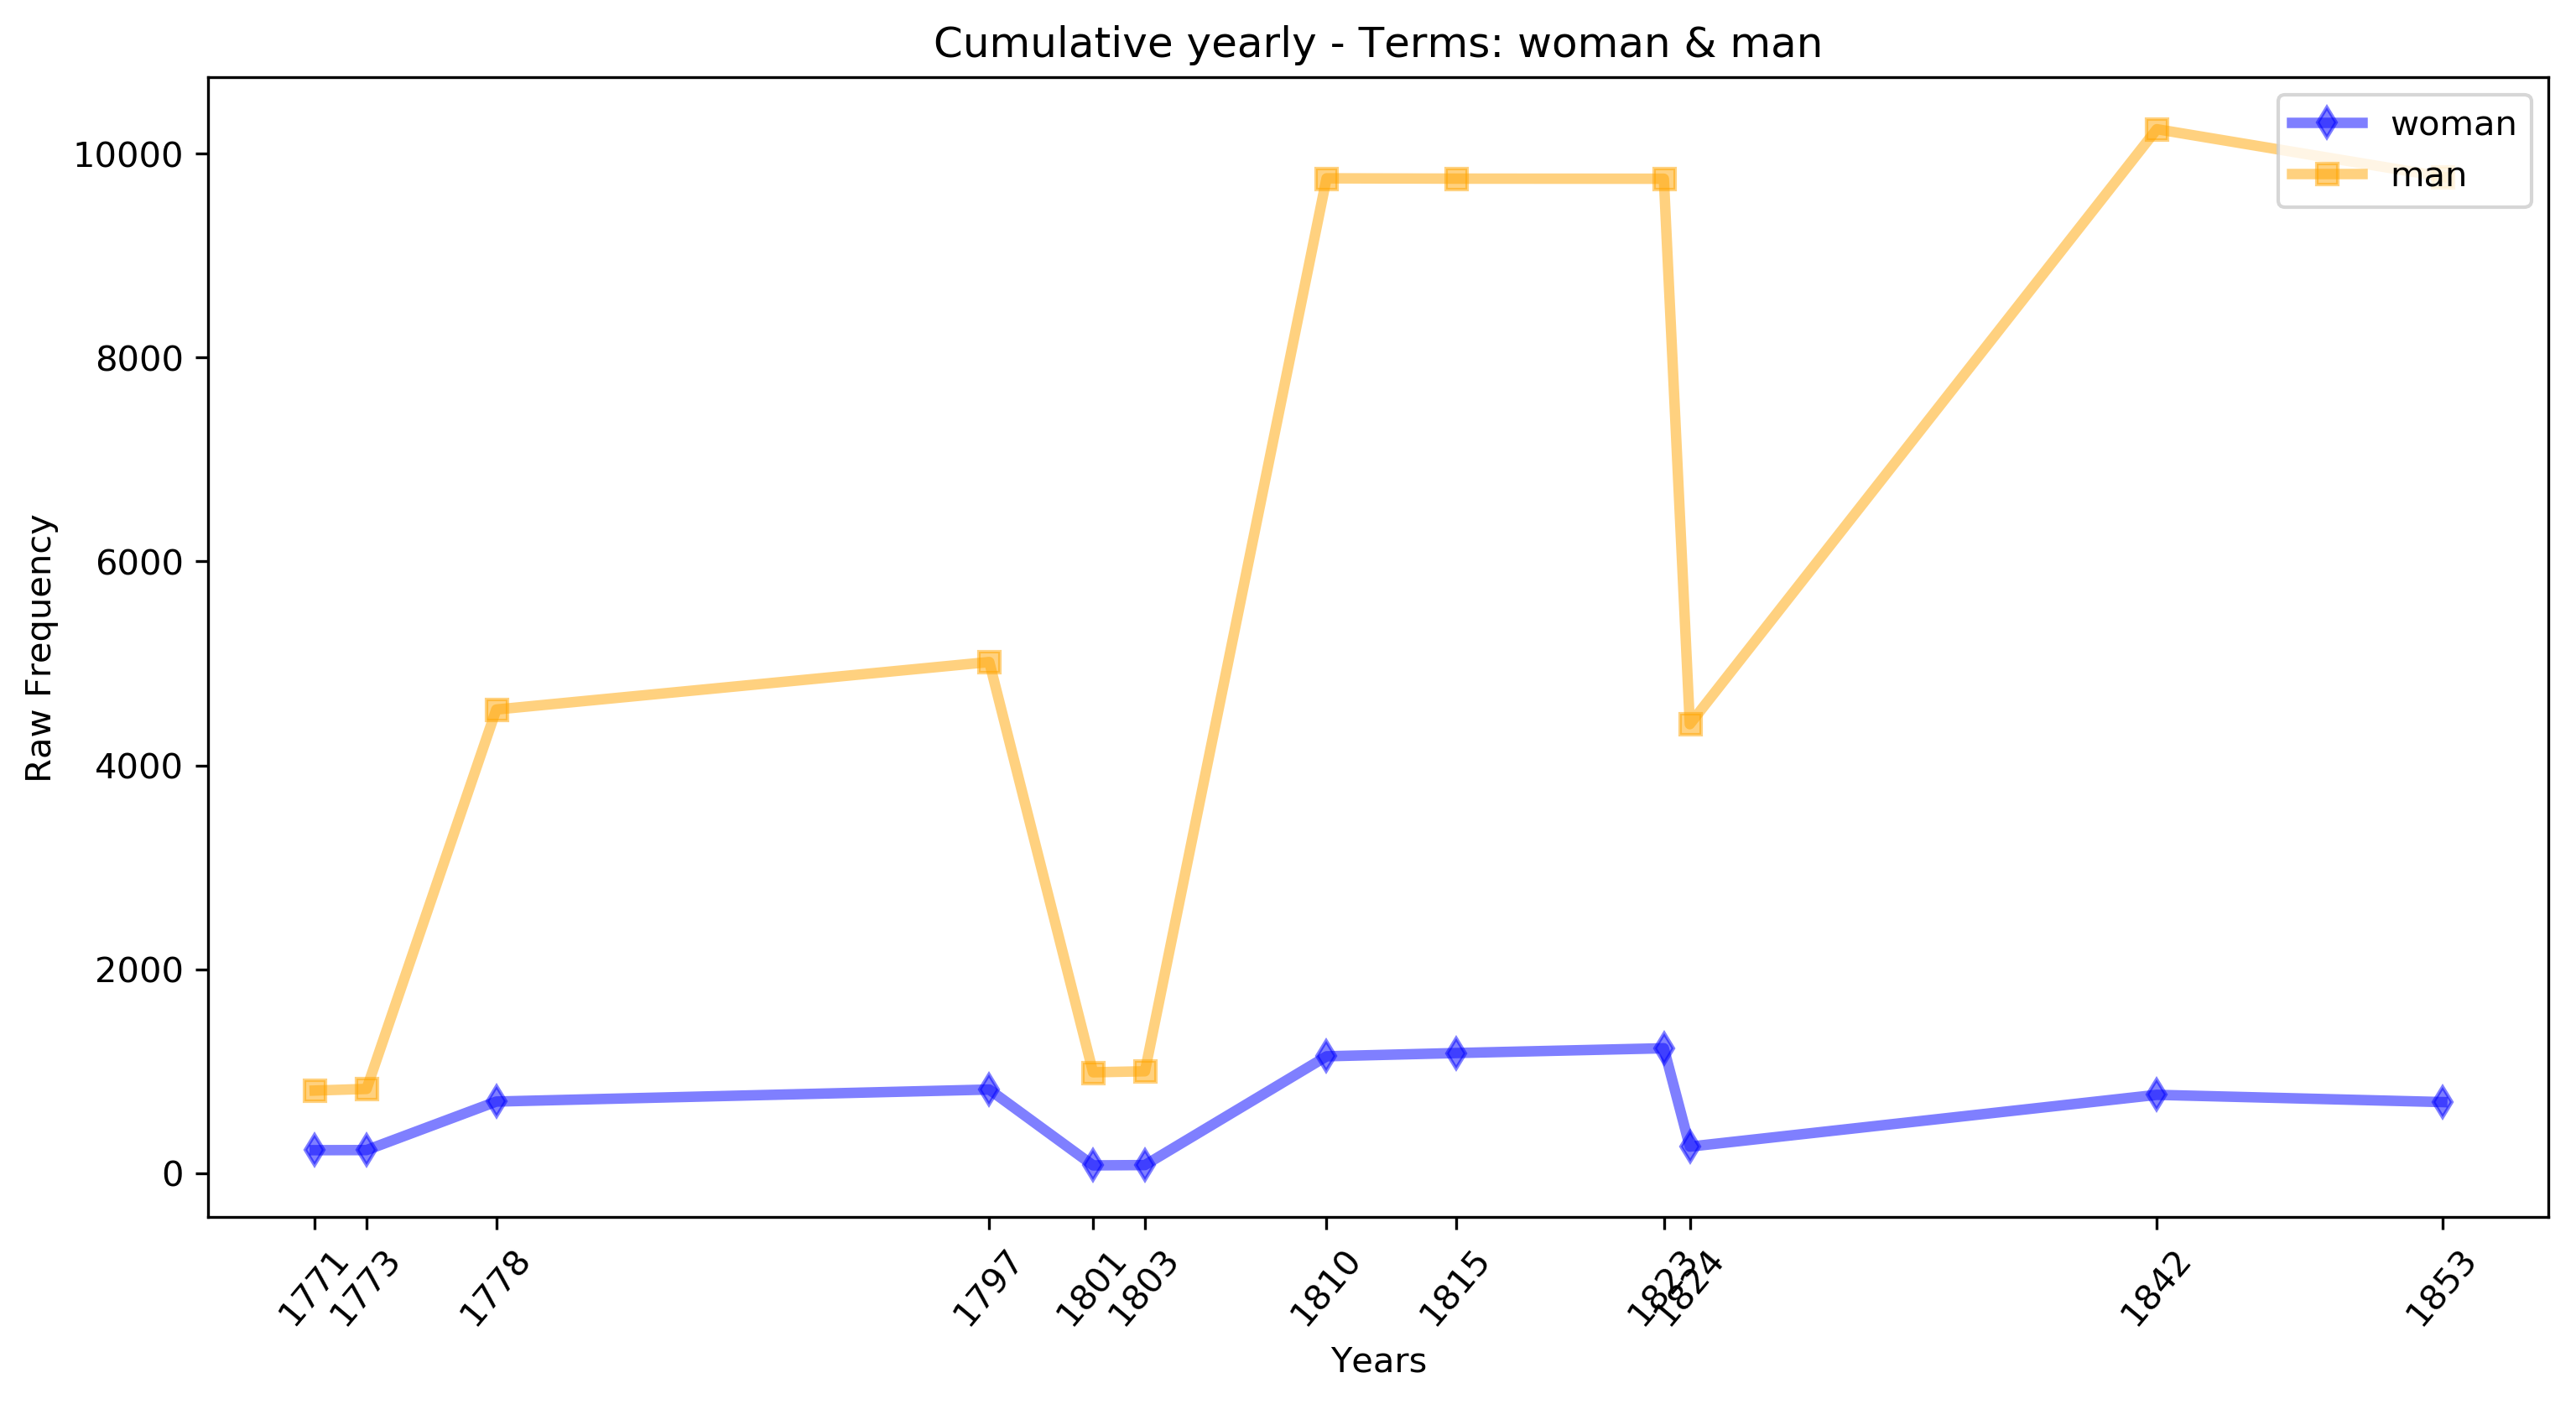

In [31]:
mpl.rcParams['figure.dpi']=300
cumulative_plot(woman_f_count, man_f_count, "woman", "man")

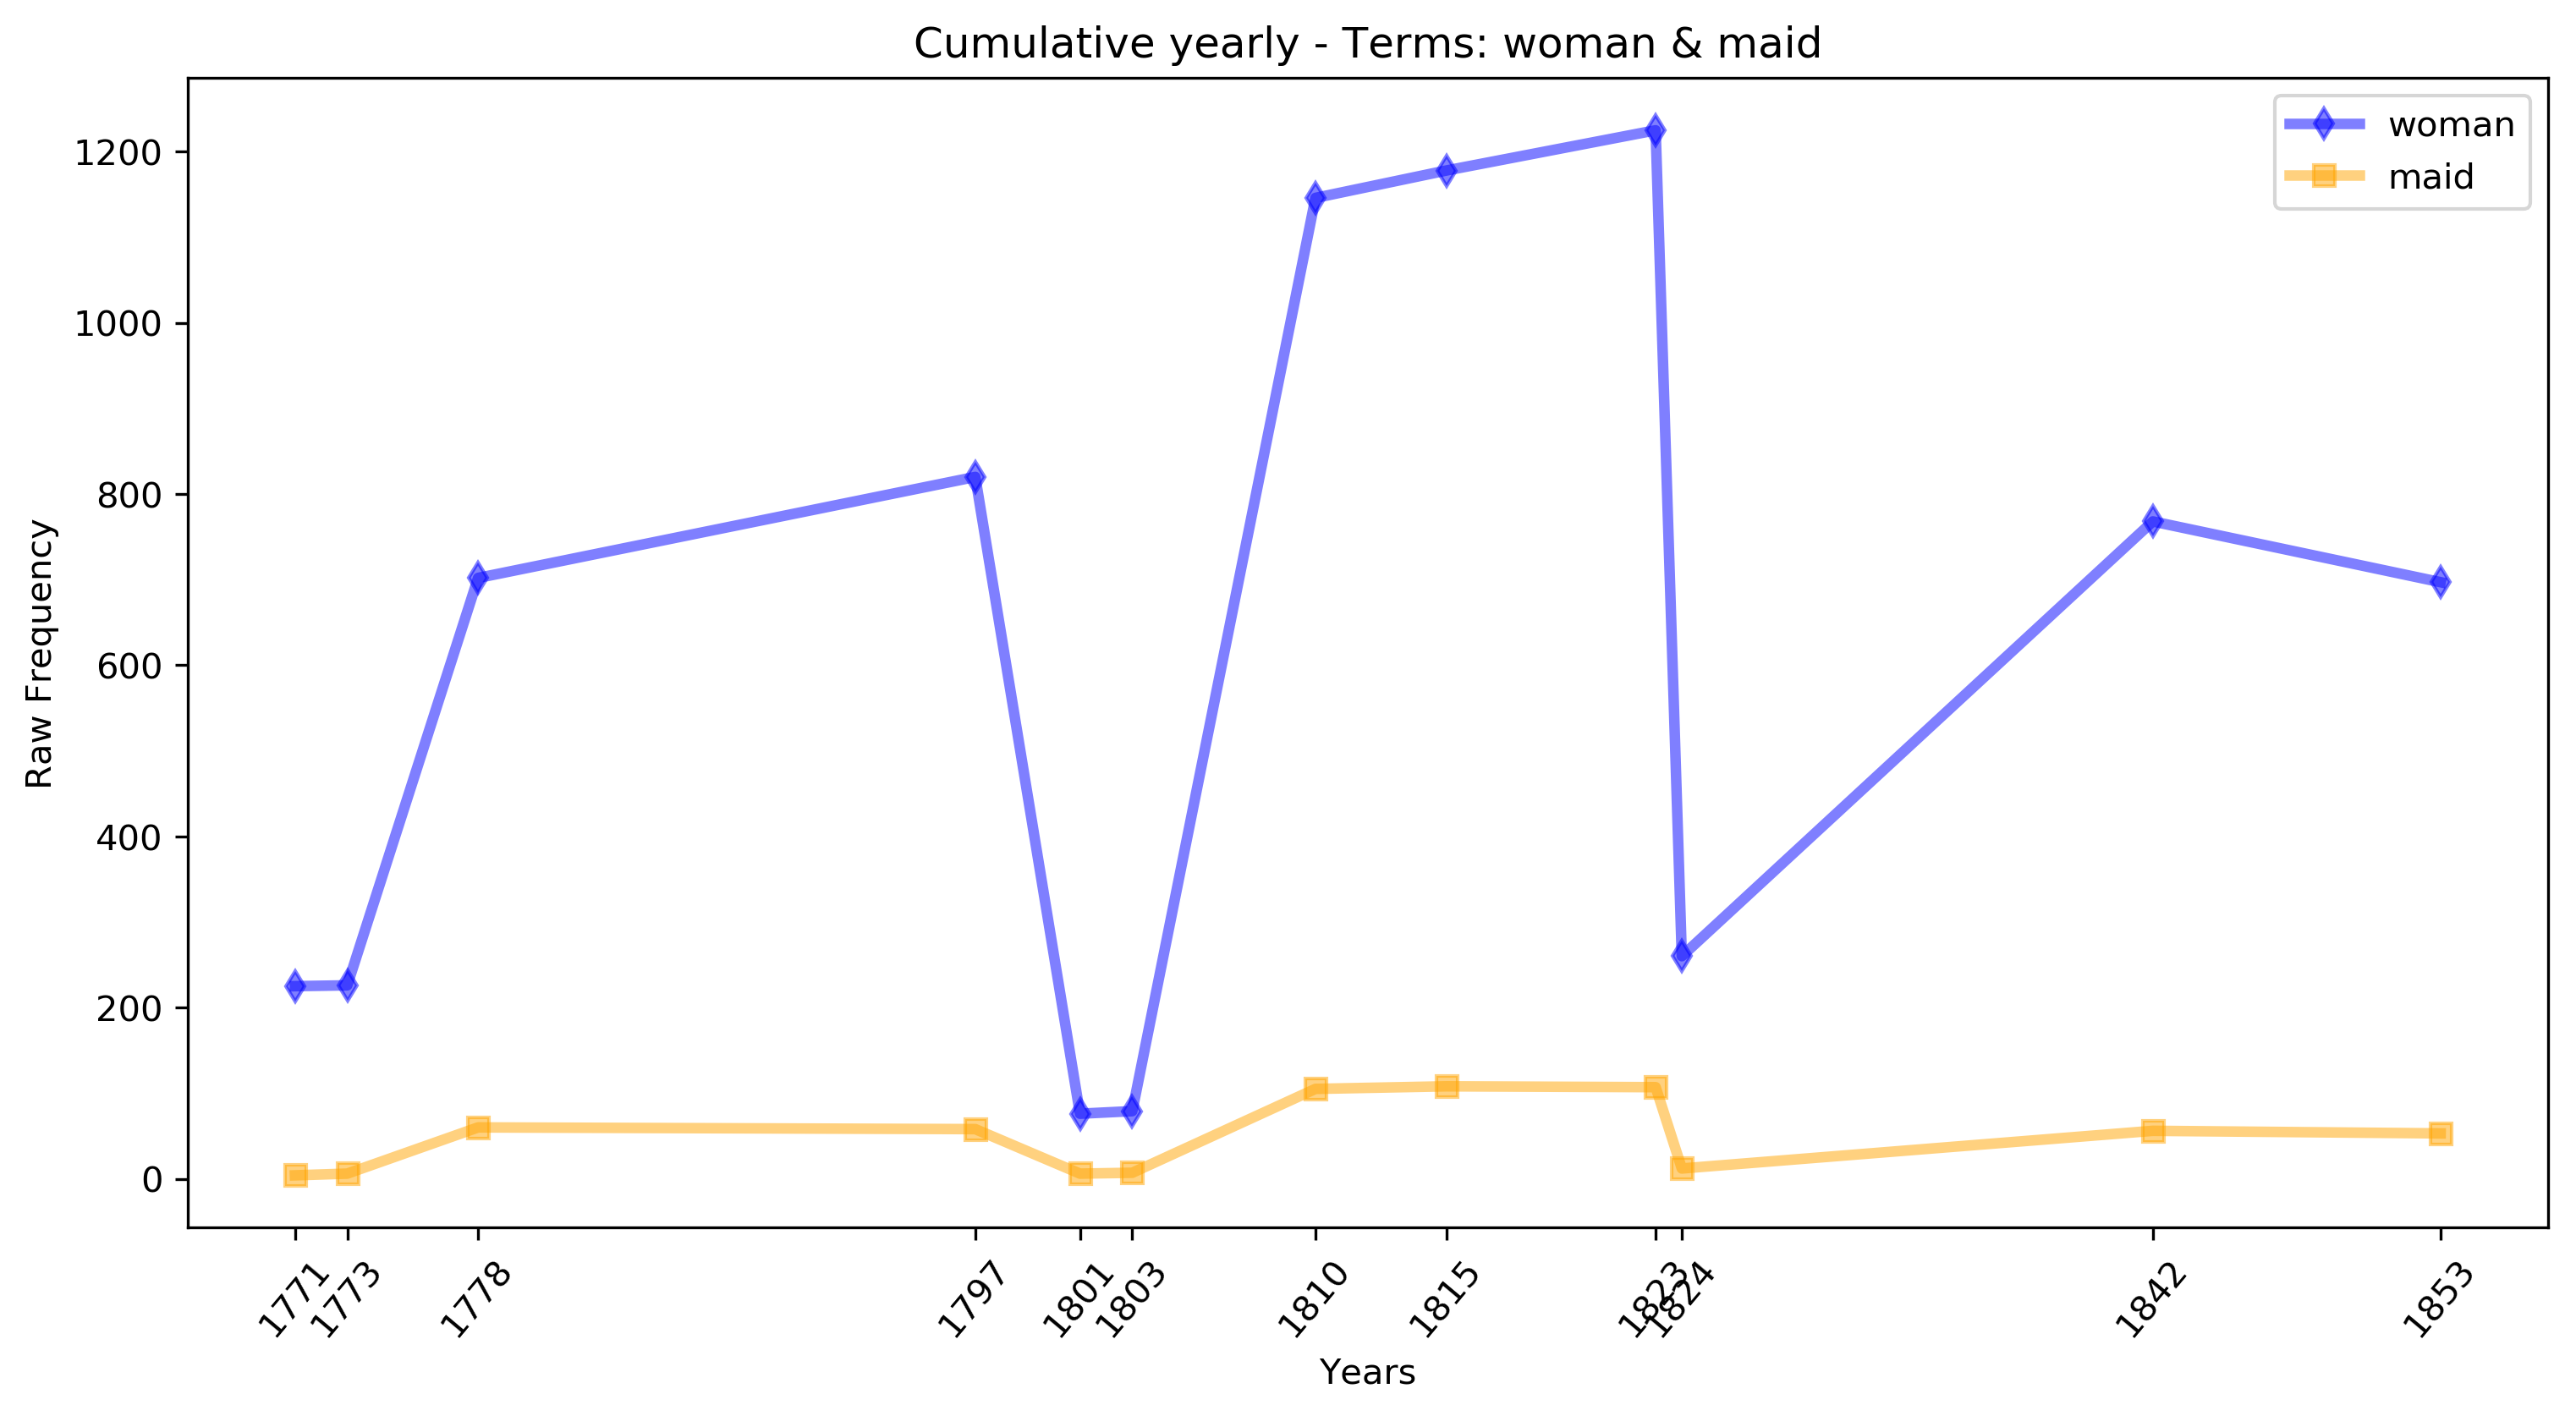

In [32]:
mpl.rcParams['figure.dpi']=300
cumulative_plot(woman_f_count, maid_f_count, "woman", "maid")

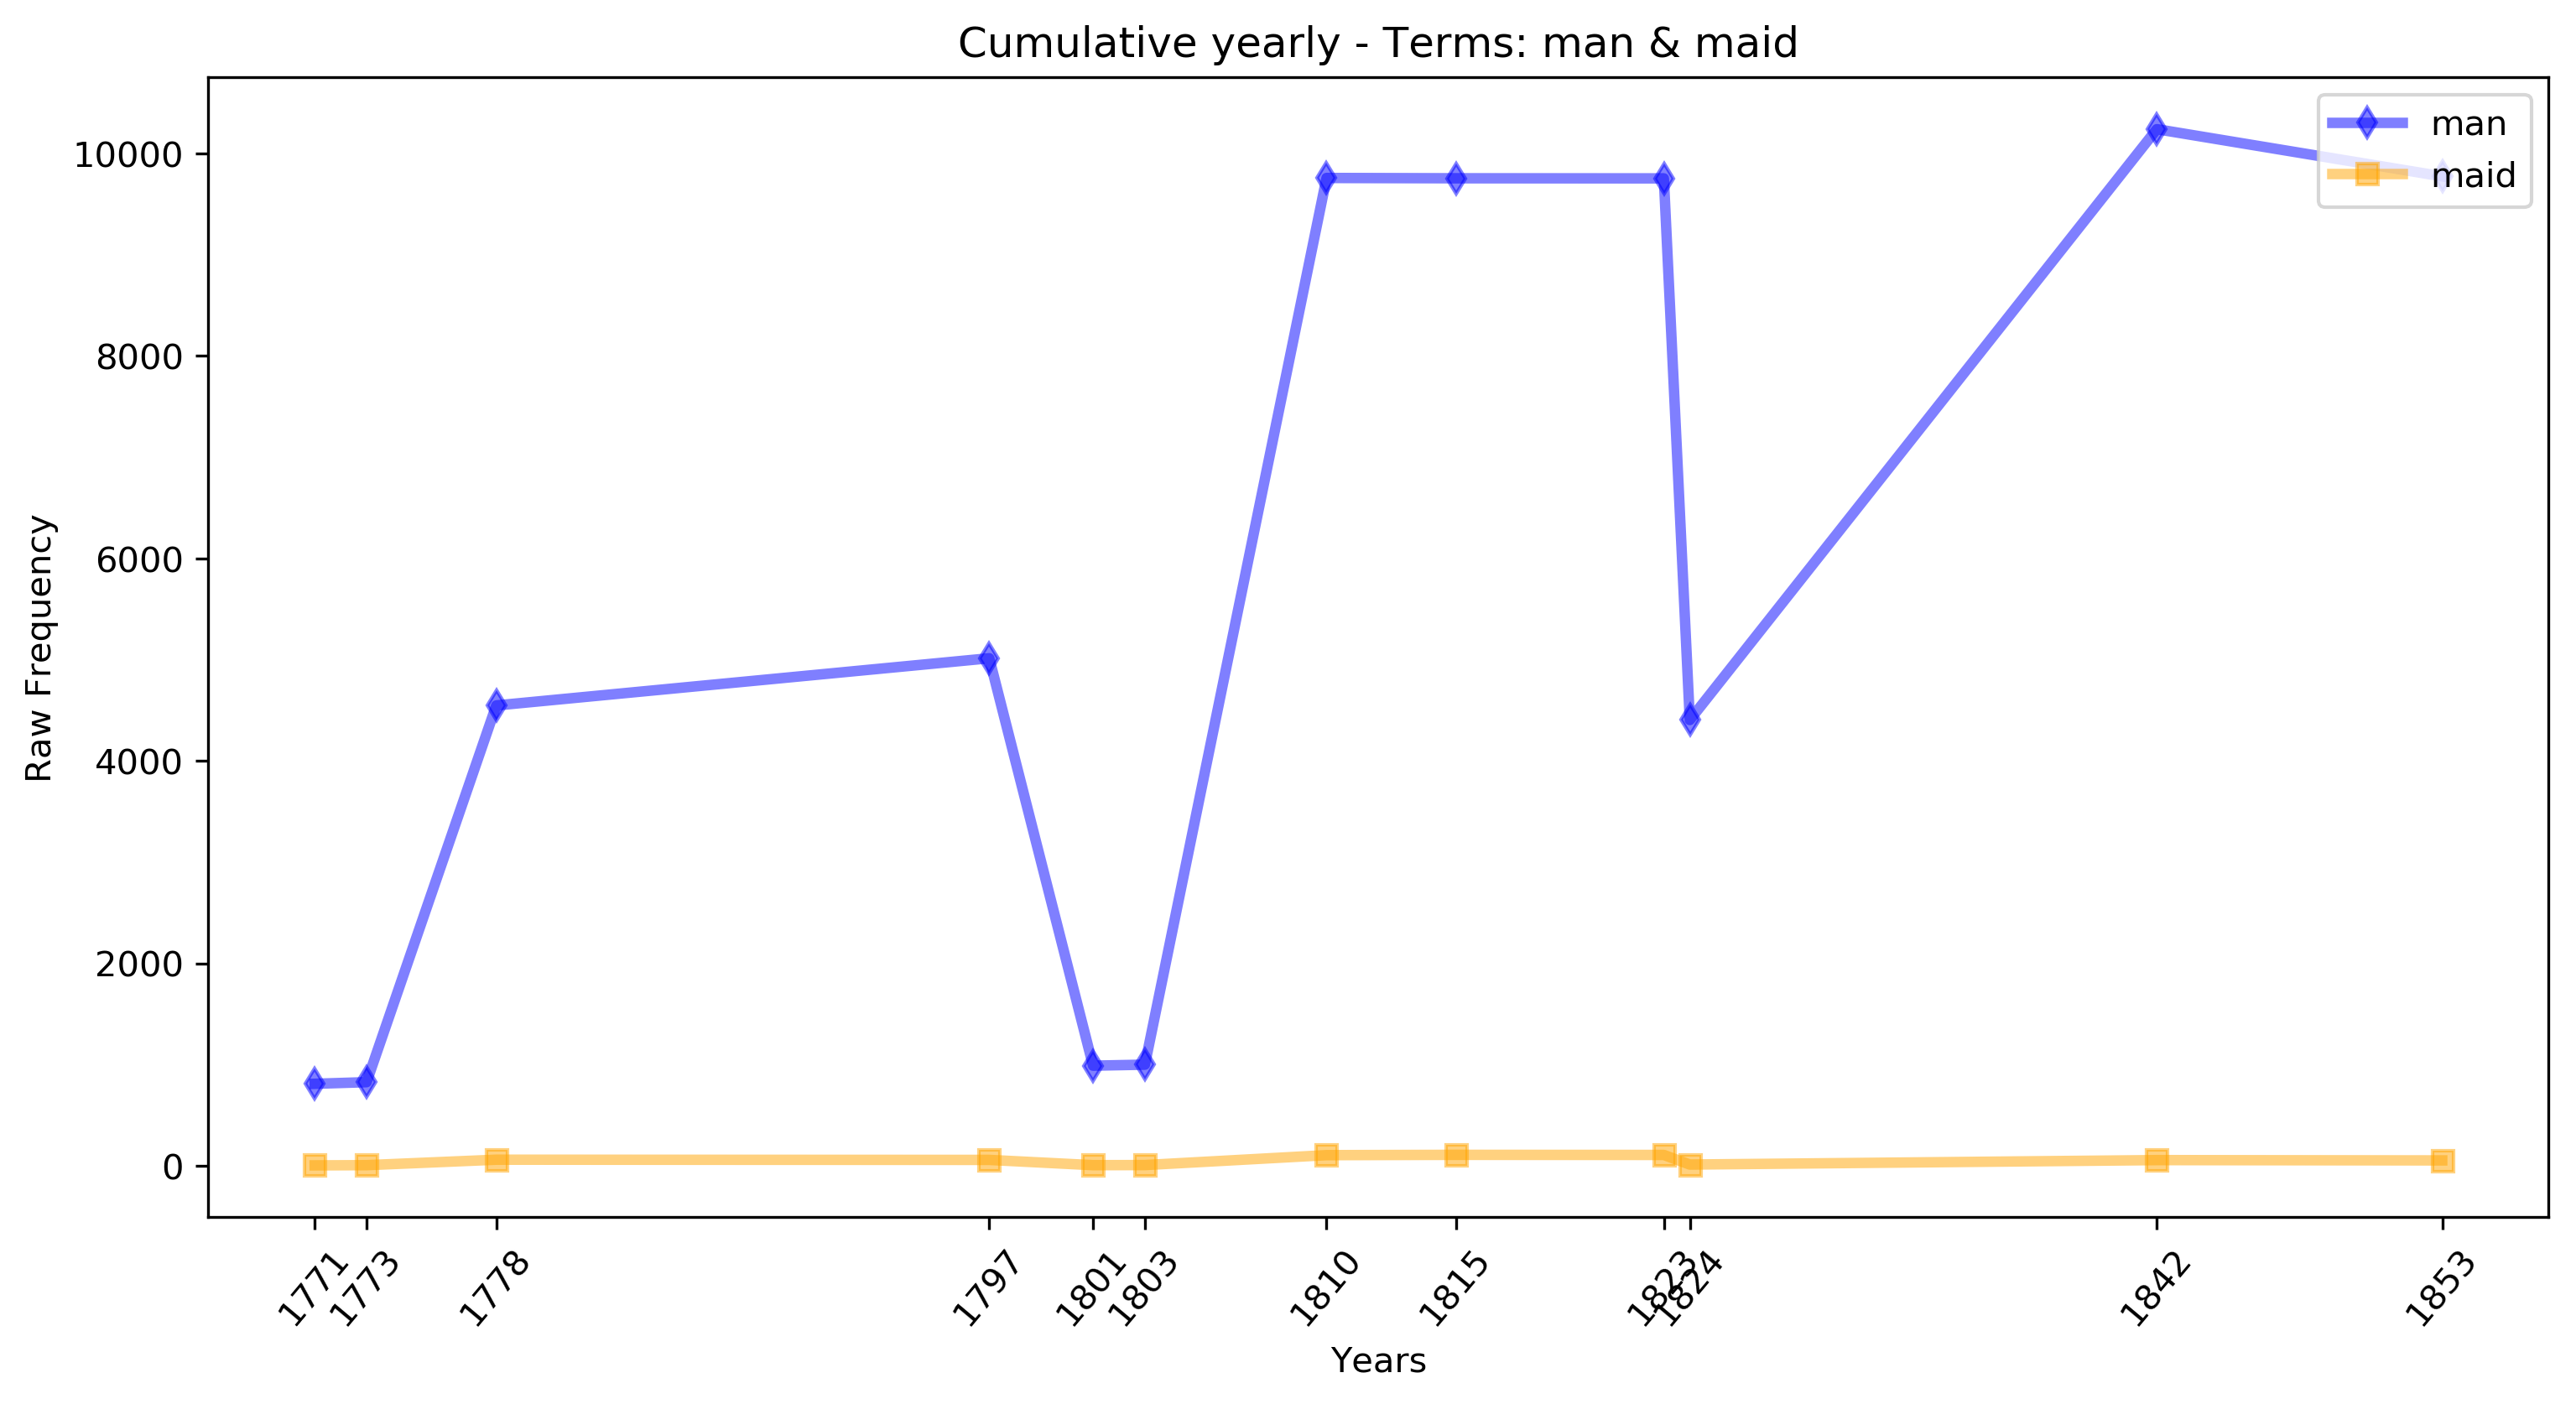

In [33]:
mpl.rcParams['figure.dpi']=300
cumulative_plot(man_f_count, maid_f_count, "man", "maid")

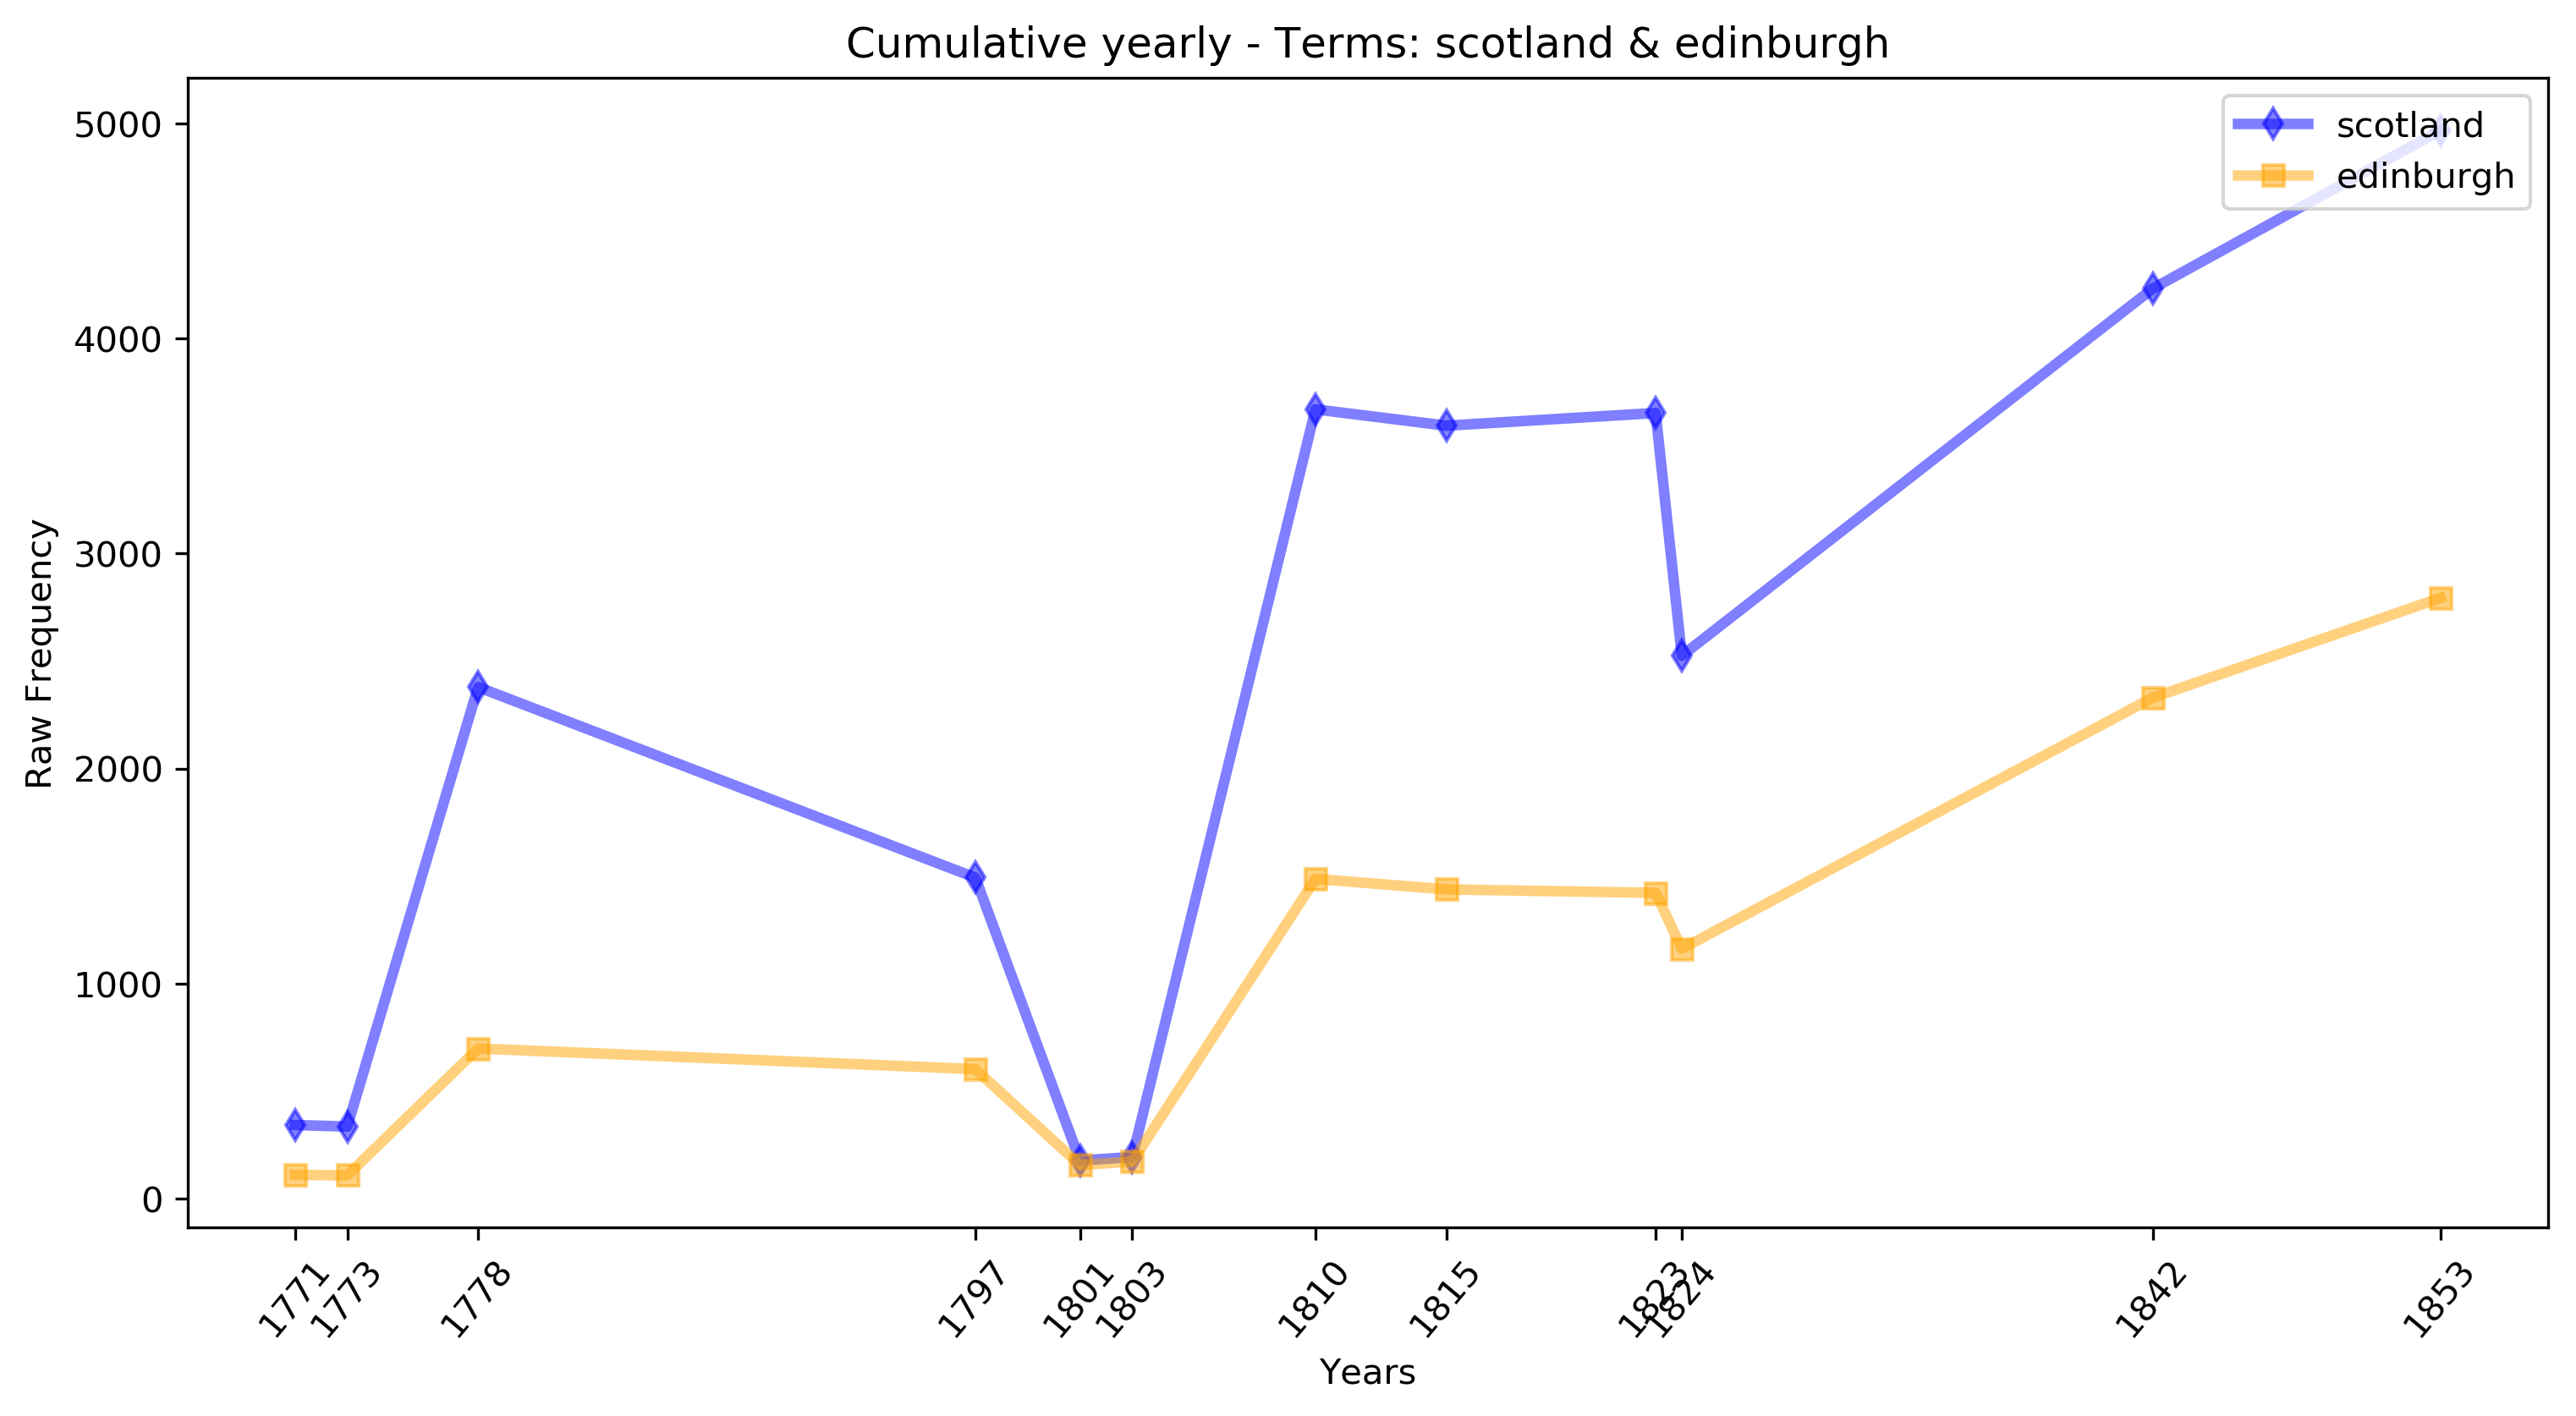

In [34]:
mpl.rcParams['figure.dpi']=300
cumulative_plot(scotland_f_count, edinburgh_f_count, "scotland", "edinburgh")

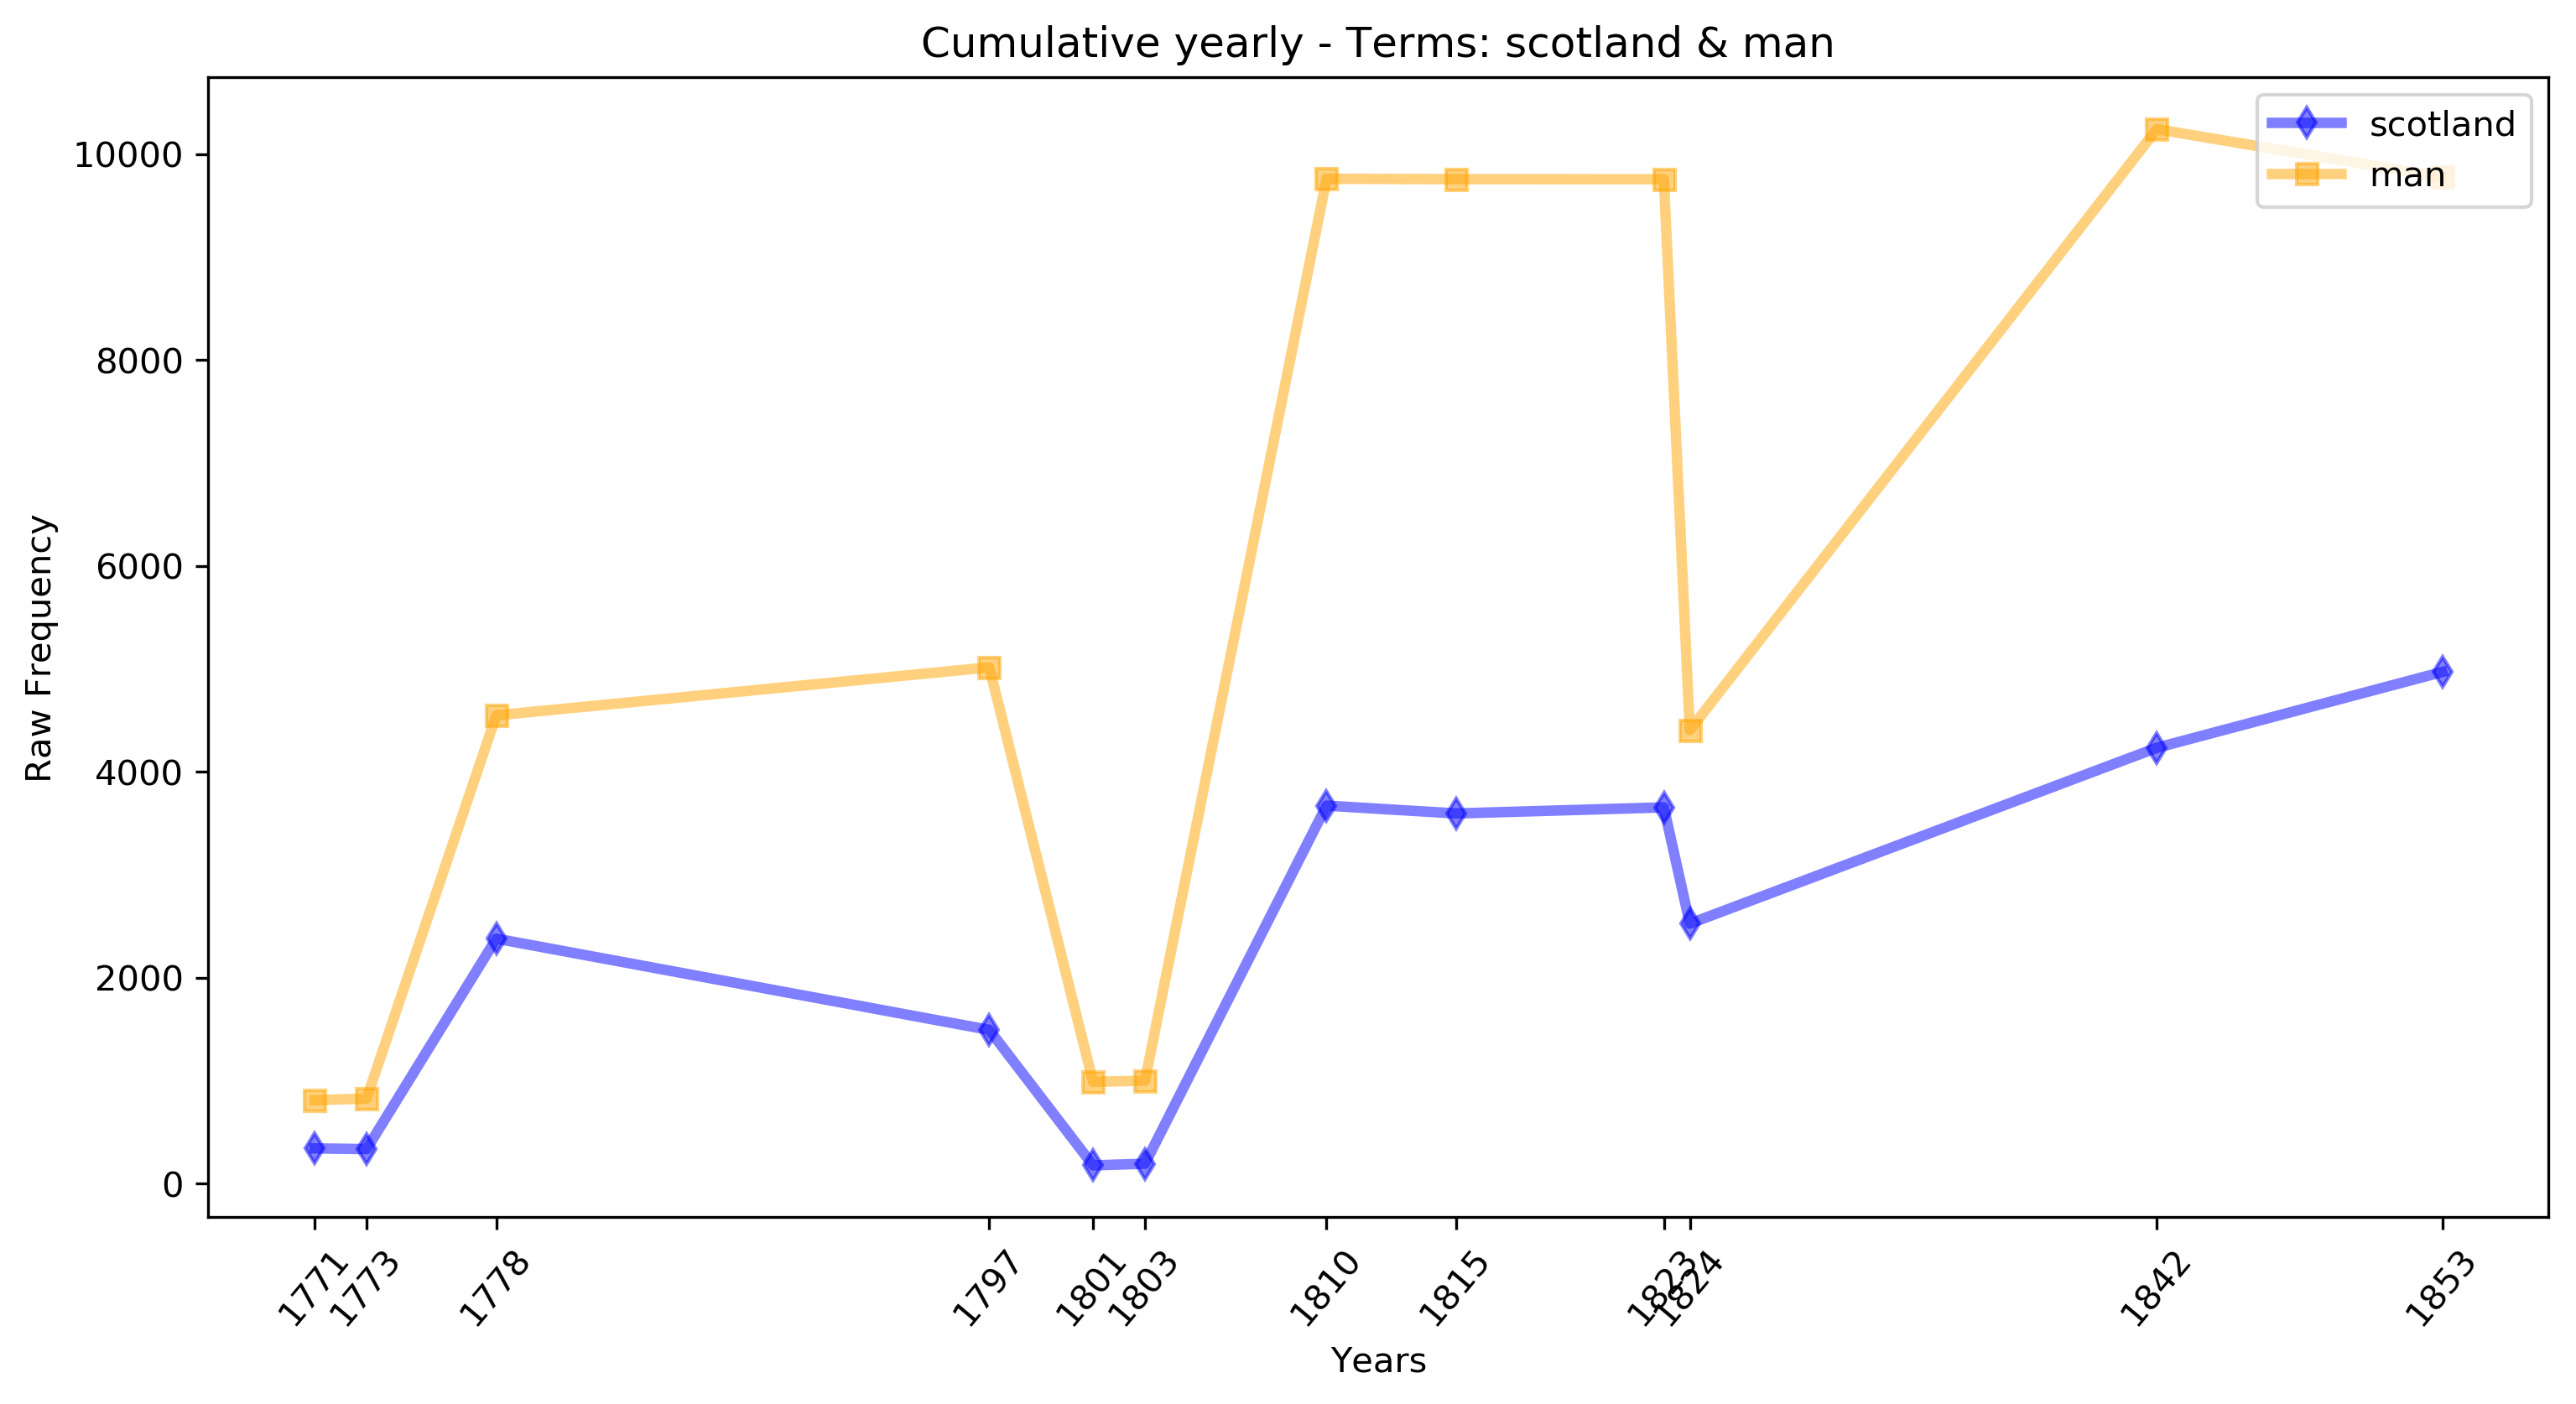

In [35]:
mpl.rcParams['figure.dpi']=300
cumulative_plot(scotland_f_count, man_f_count, "scotland", "man")

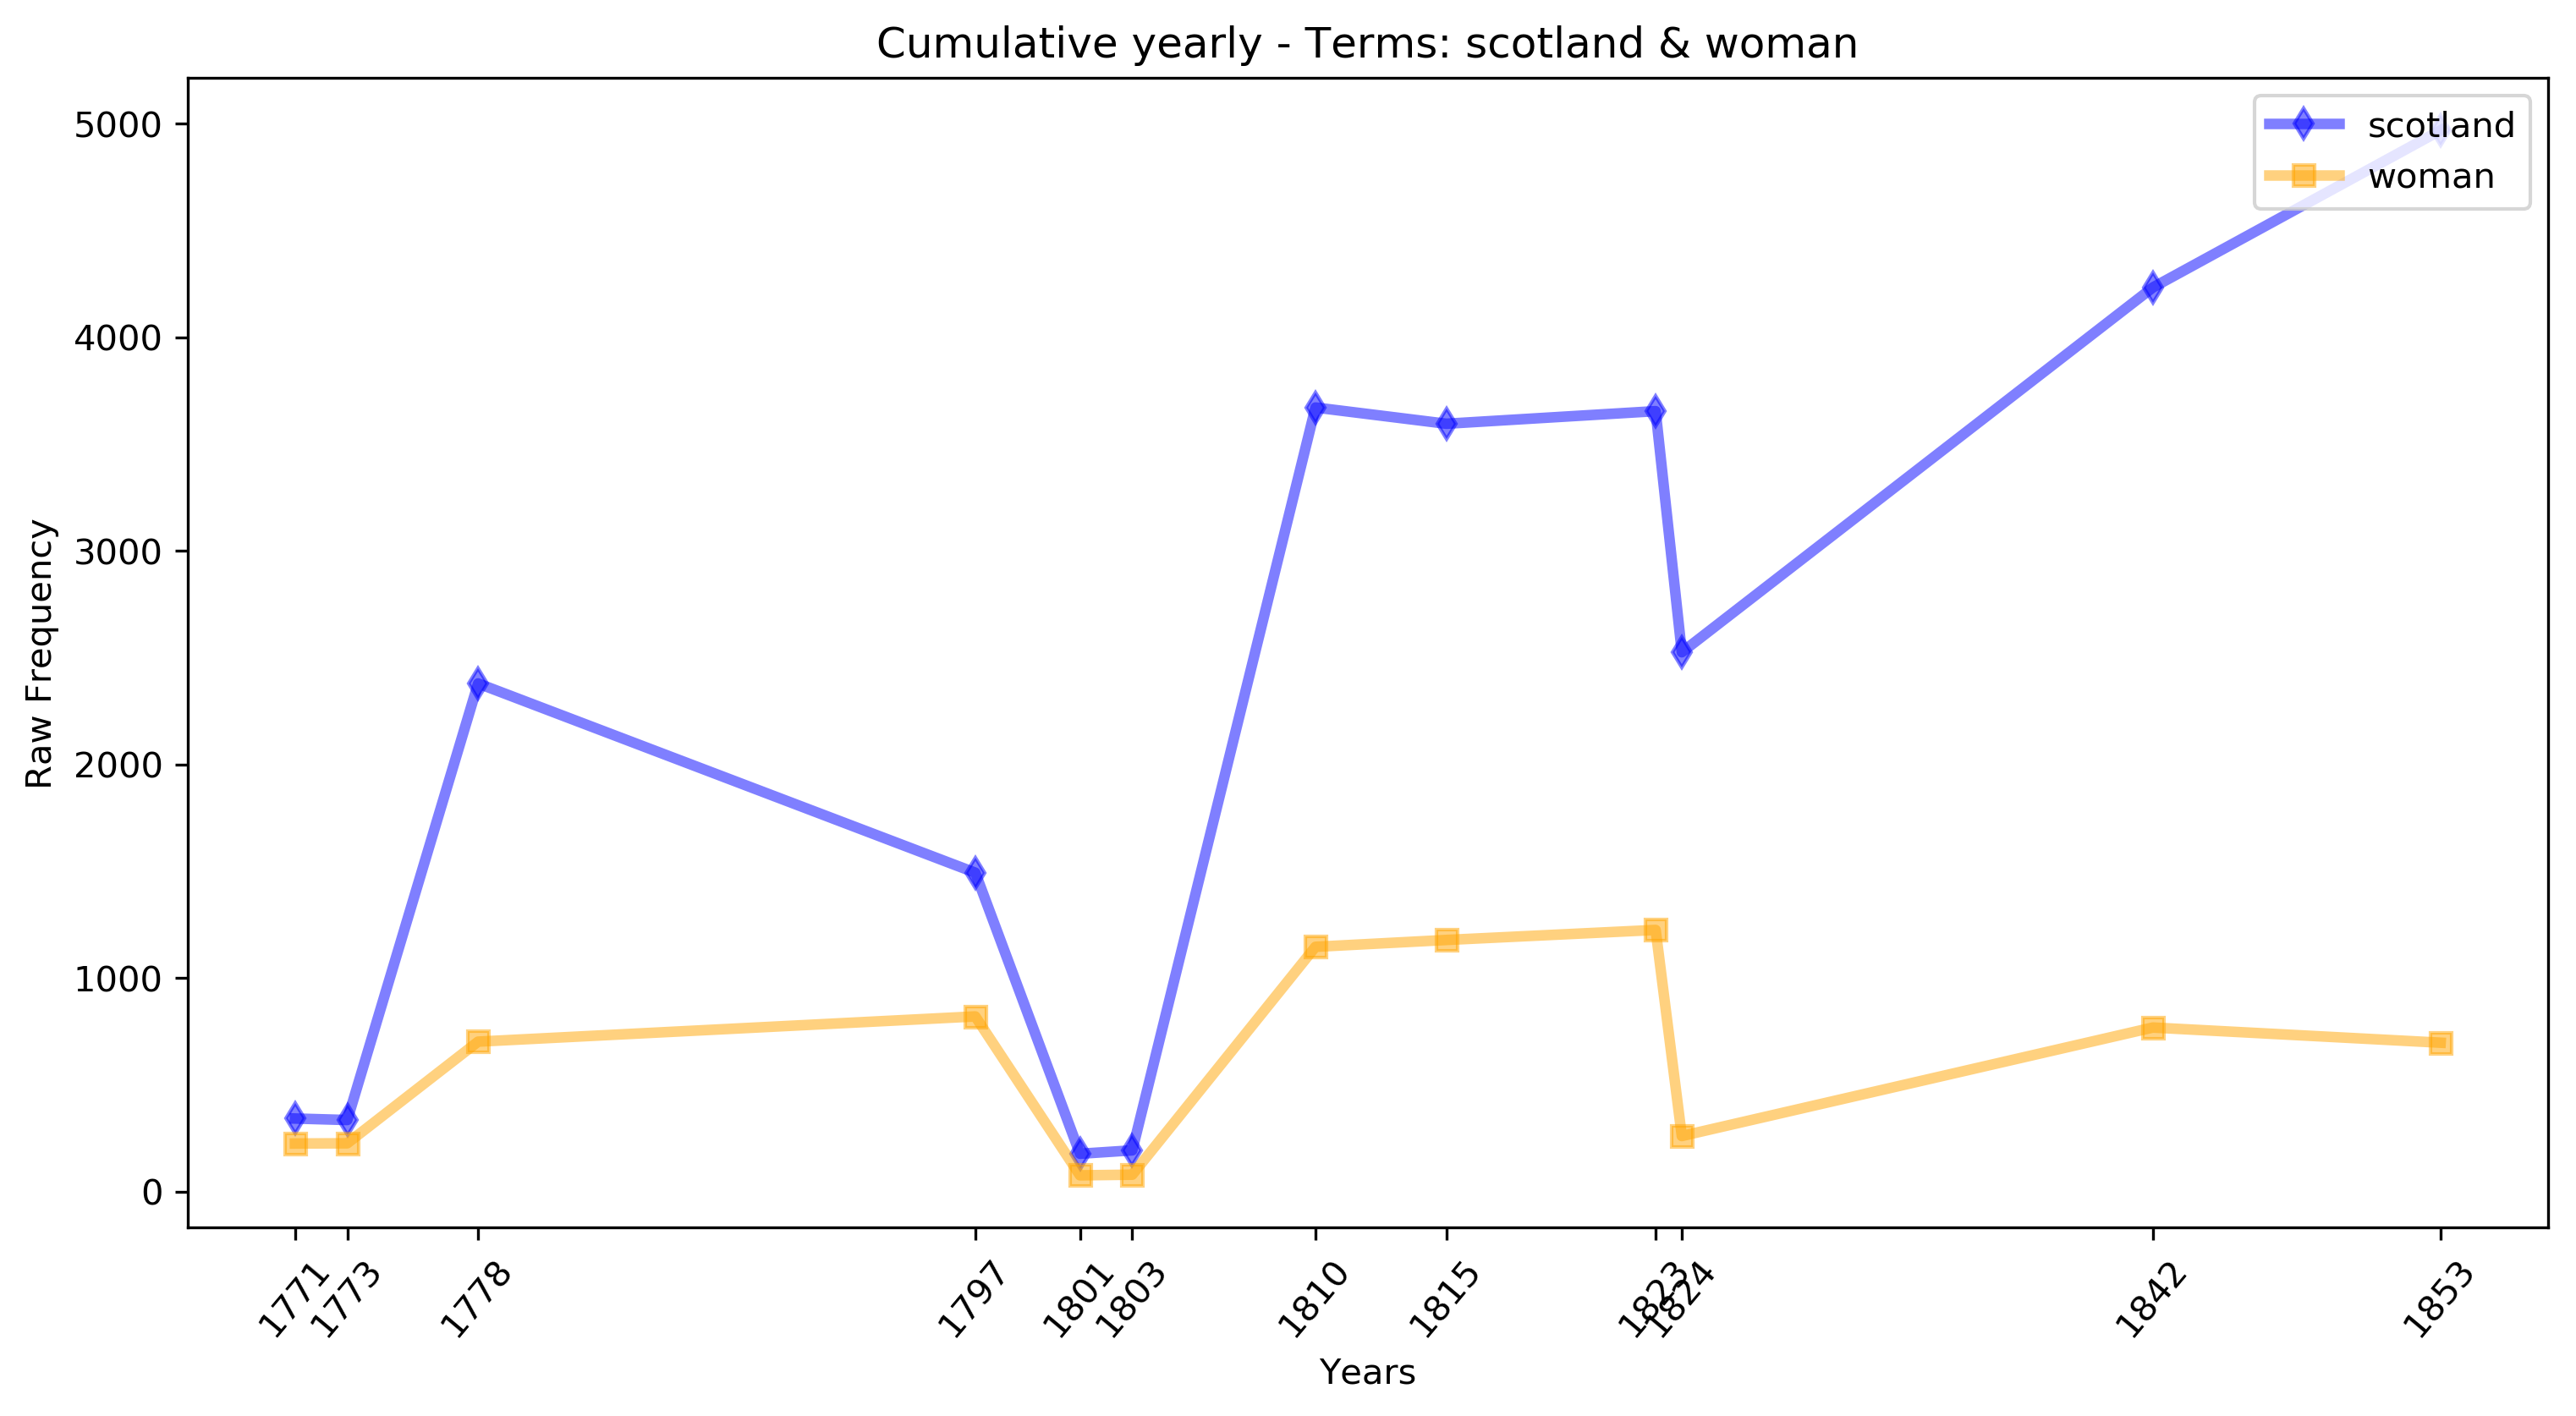

In [36]:
mpl.rcParams['figure.dpi']=300
cumulative_plot(scotland_f_count, woman_f_count, "scotland", "woman")

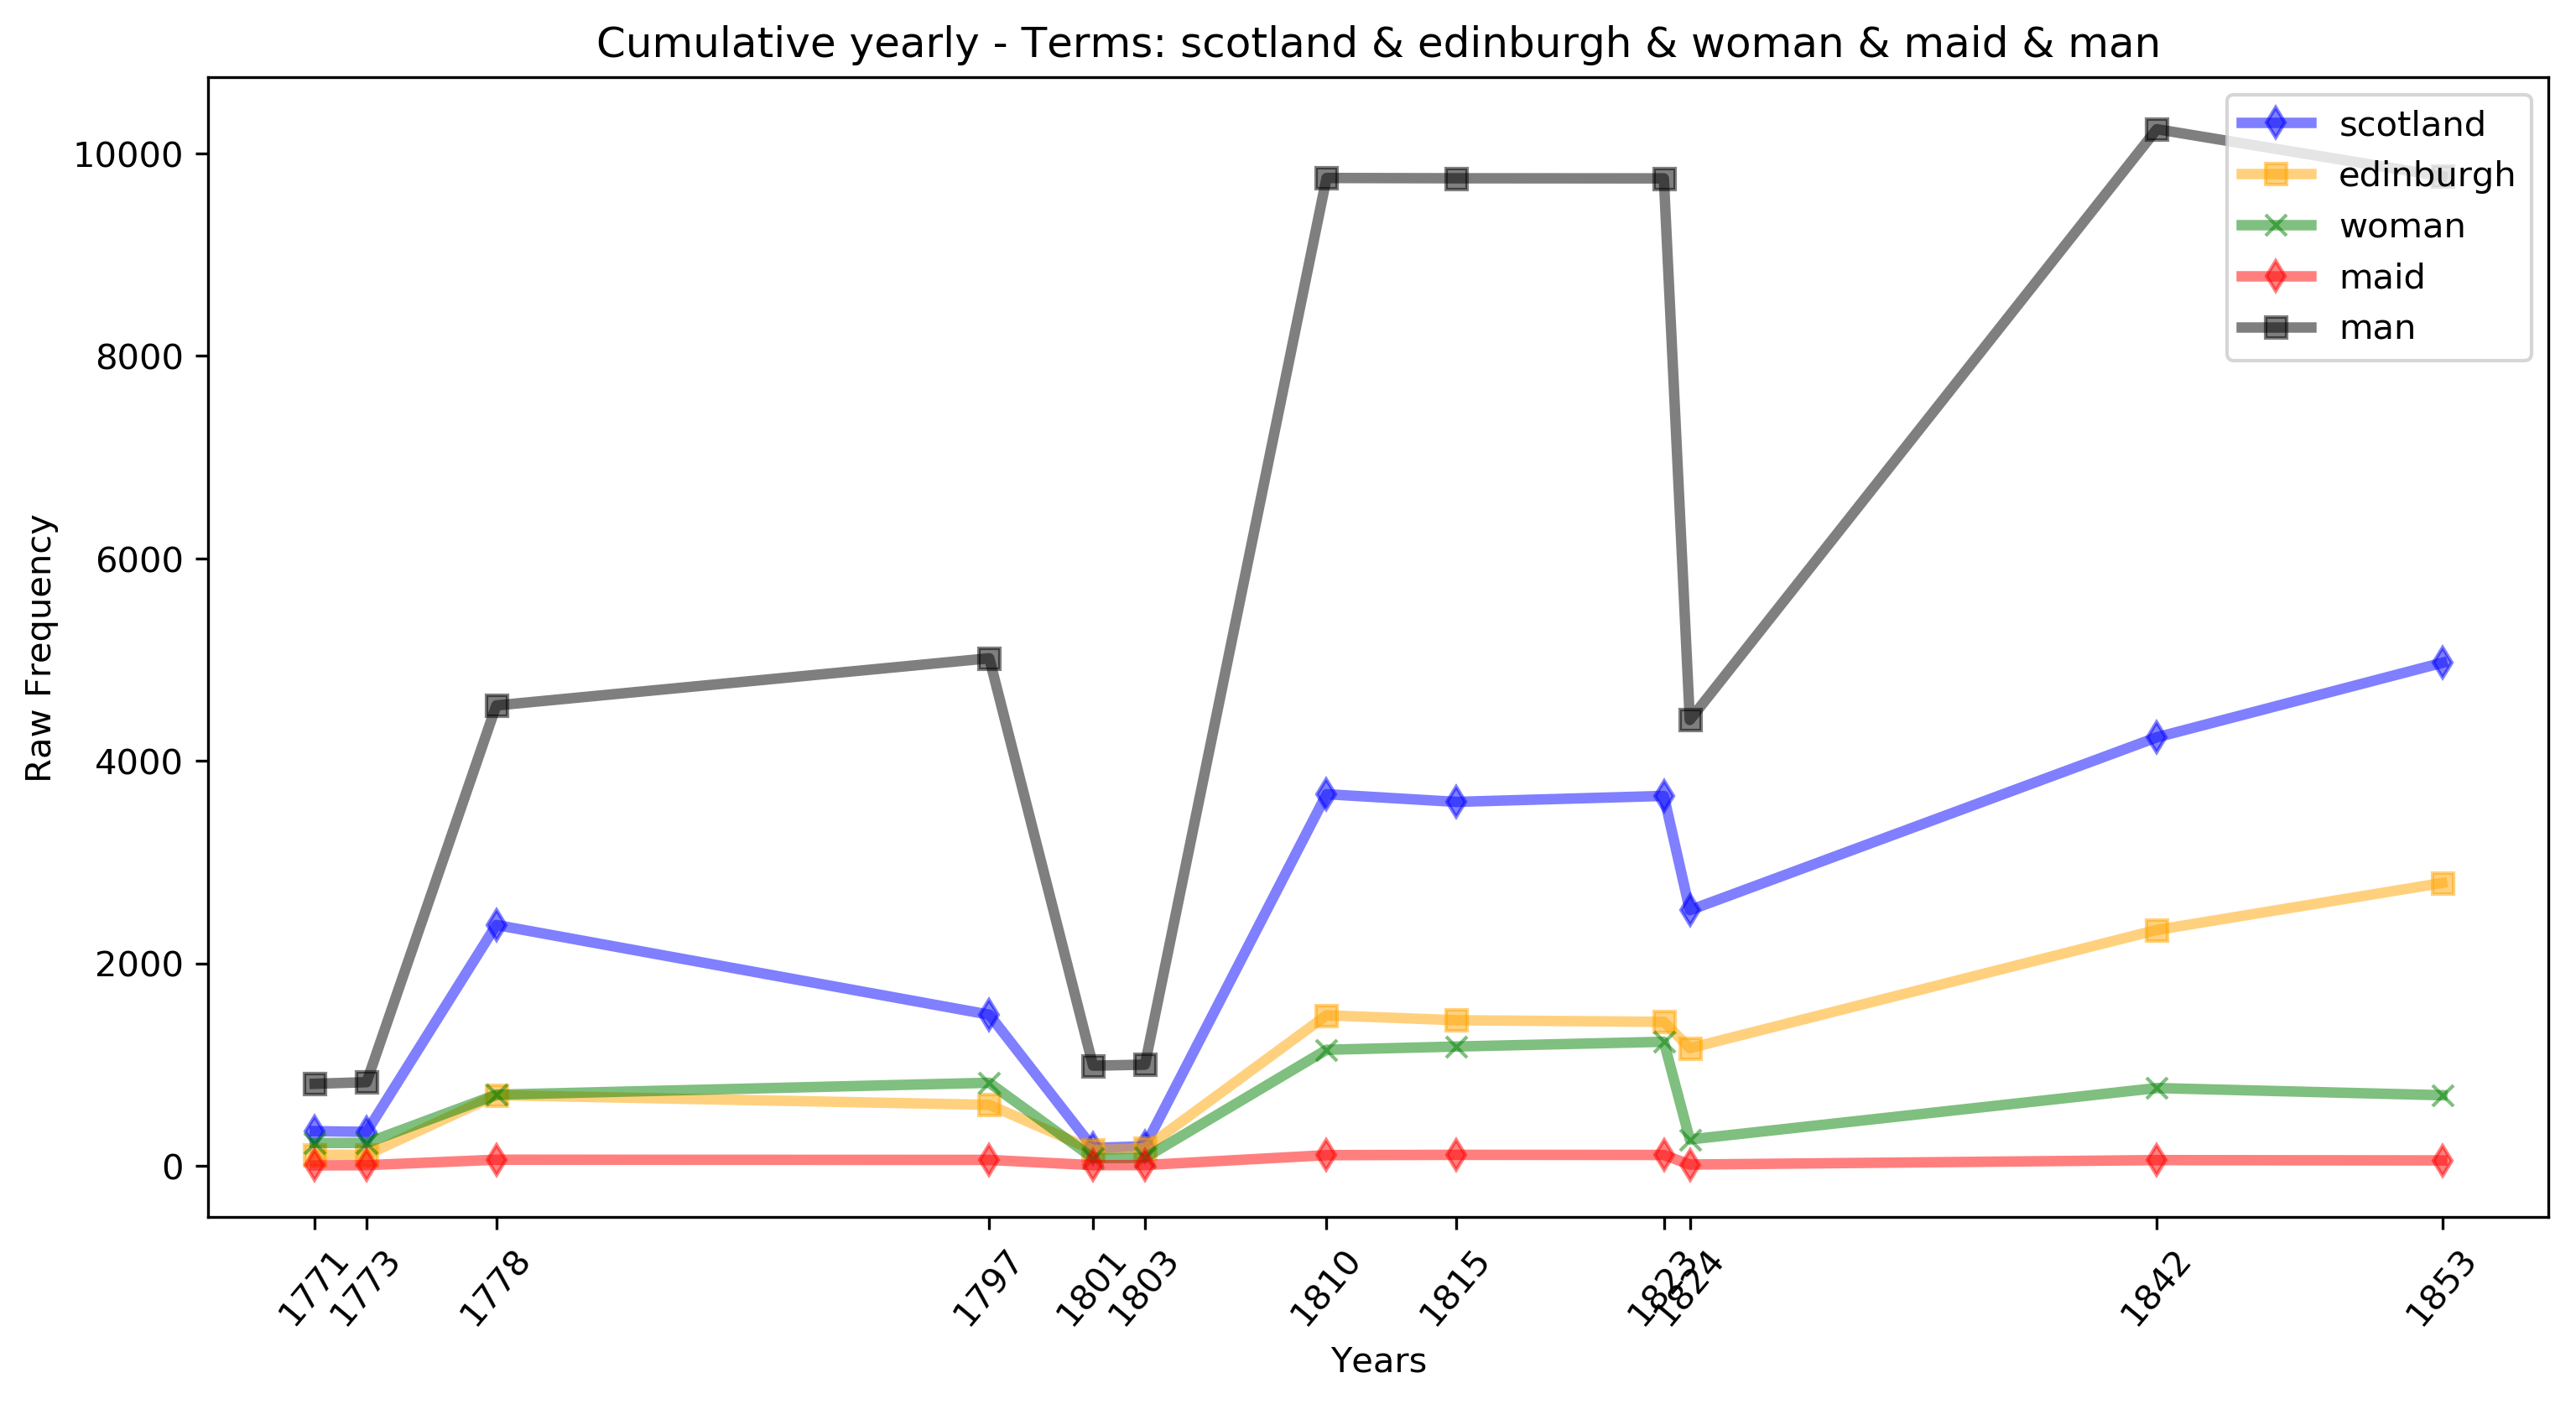

In [37]:
mpl.rcParams['figure.dpi']=300
total_cumulative_plot(scotland_f_count, edinburgh_f_count, woman_f_count, maid_f_count, man_f_count, "scotland", "edinburgh", "woman", "maid", "man")